In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statistics
from statannot import add_stat_annotation
from scipy.stats import f_oneway, kruskal, ttest_ind
from scikit_posthocs import posthoc_dunn, sign_plot

In [3]:
#files = ["S1L1-Scene-04-LADc1.czi Annotations.txt", "S2L1-Scene-04-LADc1.czi Annotations.txt", "S3L1-Scene-04-LADc1.czi Annotations.txt", "S4L1-Scene-04-LADc1.czi Annotations.txt", "S5L1-1-Scene-04-LADc1.czi Annotations.txt", "S6L1-1-Scene-04-LADc1.czi Annotations.txt", "S7L1-1-Scene-04-LADc1.czi Annotations.txt", "S8L1-1-Scene-04-LADc1.czi Annotations.txt", "S9L1-1-Scene-04-LADc1.czi Annotations.txt", "S10L1-1-Scene-04-LADc1.czi Annotations.txt"]
#files = ["S1L1-Scene-10-LPDc1.czi Annotations.txt", "S2L1-Scene-10-LPDc1.czi Annotations.txt", "S3L1-Scene-10-LPDc1.czi Annotations.txt", "S4L1-Scene-10-LPDc1.czi Annotations.txt", "S5L1-1-Scene-10-LPDc1.czi Annotations.txt", "S6L1-1-Scene-10-LPDc1.czi Annotations.txt", "S7L1-1-Scene-10-LPDc1.czi Annotations.txt", "S8L1-1-Scene-10-LPDc1.czi Annotations.txt", "S9L1-1-Scene-10-LPDc1.czi Annotations.txt", "S10L1-1-Scene-10-LPDc1.czi Annotations.txt"]

files = ["/home/mariereinbigler/QuPath/projects/Cellpose_final_measures/InfDiam_Centro_results//S1L2-Scene-11-PSODc2.czi Annotations.txt", 
         "/home/mariereinbigler/QuPath/projects/Verite_measures/InfDiam_Centro_results_verite_partial/S37L1-Scene-01-LADc1.czi (1) Annotations.txt"]

#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_measures/InfDiam_Centro_results/"

In [4]:
raw_df = pd.read_csv( files[0], delimiter="\t")
raw_df1 = pd.read_csv( files[1], delimiter="\t", usecols=[0,2,7])

In [5]:
raw_df

Image     Name    Class Parent       ROI  Centroid X µm  \
0  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry         1370.8   
1  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry         1796.7   
2  S1L2-Scene-11-PSODc2.czi   Centro   Centro  Image  Geometry         1632.4   
3  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry         1442.5   
4  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry         1322.8   

   Centroid Y µm  Classifier_improved_V5: Cell %  \
0         508.70                         70.3947   
1         504.42                         70.8661   
2         523.29                         80.0000   
3         751.23                         72.5962   
4         576.90                         77.7778   

   Classifier_improved_V5: Cell area µm^2  Classifier_improved_V5: Other %  \
0                               1328.8247                          29.6053   
1                               1117.7030                          29.1339   
2                               1937.3519                          20.0000   
3                               1875.2573                          27.4038   
4                               1825.5815                          22.2222   

   Classifier_improved_V5: Other area µm^2  Min diameter µm  Num Detections  \
0                                 558.8515          41.5632               0   
1                                 459.5001          39.7373               0   
2                                 484.3380          49.8790               1   
3                                 707.8785          51.9797               0   
4                                 521.5947          48.0793               0   

   Area µm^2  Perimeter µm  
0     1900.7        234.35  
1     1533.7        195.58  
2     2445.8        249.33  
3     2570.5        237.87  
4     2369.7        249.33

In [399]:
raw_df.describe()

Min diameter µm
count       459.000000
mean         38.787464
std          14.117455
min           8.030200
25%          28.550300
50%          38.422700
75%          48.132000
max          77.088400

In [400]:
df_masks = raw_df['Min diameter µm']<=100

In [401]:
df_masks

0      True
1      True
2      True
3      True
4      True
       ... 
454    True
455    True
456    True
457    True
458    True
Name: Min diameter µm, Length: 459, dtype: bool

In [402]:
df = raw_df[df_masks]

In [403]:
df.describe()

Min diameter µm
count       459.000000
mean         38.787464
std          14.117455
min           8.030200
25%          28.550300
50%          38.422700
75%          48.132000
max          77.088400

In [404]:
raw_df1.describe()

Min diameter µm
count       503.000000
mean         44.588069
std         149.907177
min           8.079500
25%          27.431600
50%          37.503100
75%          47.632700
max        3383.087200

In [405]:
df_masks1 = raw_df1['Min diameter µm']<=100

In [406]:
df1 = raw_df1[df_masks1]

In [407]:
df1.describe()

Min diameter µm
count       502.000000
mean         37.937673
std          15.034648
min           8.079500
25%          27.351750
50%          37.474050
75%          47.613725
max          78.141200

In [408]:
means = raw_df['Min diameter µm'].mean()

In [409]:
means

38.78746405228758

In [410]:
raw_df['Class'].value_counts()

Normale    306
Centro     153
Name: Class, dtype: int64

In [411]:
normales = raw_df['Class'].value_counts()[0]

In [412]:
centro = raw_df['Class'].value_counts()[1]

In [413]:
print("Centro_rate : {}".format(centro/(centro+normales)))

Centro_rate : 0.3333333333333333


In [414]:
df_large = pd.concat([raw_df['Min diameter µm'], df1['Min diameter µm']], axis=1)

In [415]:
df_large.columns = ['Verites', 'Prediction']

In [416]:
df_large

Verites  Prediction
0    65.4016     26.4114
1    26.9318      9.2507
2    48.6586     38.6908
3    45.1922     31.8627
4    38.1009     36.1636
..       ...         ...
498      NaN     41.8131
499      NaN     31.5094
500      NaN     33.9303
501      NaN     26.3355
502      NaN     73.4509

[503 rows x 2 columns]

<AxesSubplot:ylabel='Density'>

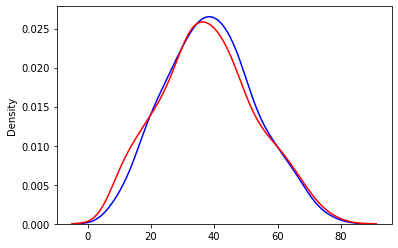

In [417]:

sns.kdeplot(np.array(df['Min diameter µm']), color="b")
sns.kdeplot(np.array(df1['Min diameter µm']), color='r')




NameError: name 'add_stat_annotation' is not defined

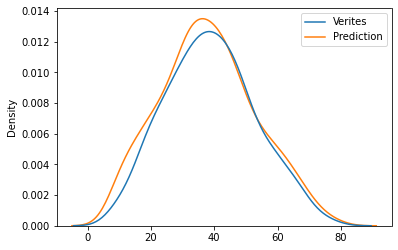

In [418]:
sns.kdeplot(data=df_large, color='r')

add_stat_annotation(ax, data=df_large,
                    box_pairs=[("Verites", "Prediction")],
                    test='Mann-Whitney', text_format='full', loc='inside', verbose=2)

In [419]:
import scipy

scipy.stats.kstest(df['Min diameter µm'].to_numpy(), df1['Min diameter µm'].to_numpy())


#scipy.stats.ks_2samp(df_large['Verites'].to_numpy(), df_large['Prediction'].to_numpy())

KstestResult(statistic=0.046194307736374764, pvalue=0.6618792888024463)

In [92]:
centro_rates = []
data = []

print(raw_df)

for elt in files:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    normales = raw_df['Class'].value_counts()[0]
    centro = raw_df['Class'].value_counts()[1]
    centro_rates.append(centro/(centro+normales))
    data = data+raw_df['Min diameter µm'].values.tolist()
    #sns.kdeplot(np.array(raw_df['Min diameter µm']))
    
#fig7, ax7 = plt.subplots()
#ax7.set_title('Multiple Samples with Different sizes')
#ax7.boxplot(data)

sns.kdeplot(data)

centro_rates1 = []
data1 = []

for elt in files1:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    normales = raw_df['Class'].value_counts()[0]
    centro = raw_df['Class'].value_counts()[1]
    centro_rates1.append(centro/(centro+normales))
    data1 = data1+raw_df['Min diameter µm'].values.tolist()
    #sns.kdeplot(np.array(raw_df['Min diameter µm']))
    
sns.kdeplot(data1)
    
centro_rates2 = []
data2 = []

for elt in files2:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    normales = raw_df['Class'].value_counts()[0]
    centro = raw_df['Class'].value_counts()[1]
    centro_rates2.append(centro/(centro+normales))
    data2 = data2+raw_df['Min diameter µm'].values.tolist()
    #sns.kdeplot(np.array(raw_df['Min diameter µm']))

sns.kdeplot(data2)

centro_rates3 = []
data3 = []


for elt in files3:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    normales = raw_df['Class'].value_counts()[0]
    centro = raw_df['Class'].value_counts()[1]
    centro_rates3.append(centro/(centro+normales))
    data3 = data3+raw_df['Min diameter µm'].values.tolist()
    #sns.kdeplot(np.array(raw_df['Min diameter µm']))

sns.kdeplot(data3)

centro_rates4 = []
data4 = []

for elt in files4:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    normales = raw_df['Class'].value_counts()[0]
    centro = raw_df['Class'].value_counts()[1]
    centro_rates4.append(centro/(centro+normales))
    data4 = data4+raw_df['Min diameter µm'].values.tolist()
    #sns.kdeplot(np.array(raw_df['Min diameter µm']))

sns.kdeplot(data4)


data = [centro_rates, centro_rates1, centro_rates2, centro_rates3, centro_rates4]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()


plt.show()




                          Image    Class  Min diameter µm
0     S50L2-Scene-12-PSODc3.czi  Normale          49.2576
1     S50L2-Scene-12-PSODc3.czi  Normale          49.7854
2     S50L2-Scene-12-PSODc3.czi  Normale          47.1830
3     S50L2-Scene-12-PSODc3.czi  Normale          42.5098
4     S50L2-Scene-12-PSODc3.czi  Normale          48.6659
...                         ...      ...              ...
1611  S50L2-Scene-12-PSODc3.czi  Normale          28.5434
1612  S50L2-Scene-12-PSODc3.czi  Normale          32.0195
1613  S50L2-Scene-12-PSODc3.czi  Normale          50.8457
1614  S50L2-Scene-12-PSODc3.czi  Normale          35.1331
1615  S50L2-Scene-12-PSODc3.czi  Normale          34.6882

[1616 rows x 3 columns]


FileNotFoundError: [Errno 2] No such file or directory: '/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_blue45/InfDiam_Centro_results_red_diam35/PSODc'

In [ ]:
sns.kdeplot(data, palette="crest", alpha=.5, fill=True)


In [ ]:
sns.displot(data, kde=True, bins=17,
         color = 'darkblue')

In [ ]:
plt.hist(data)

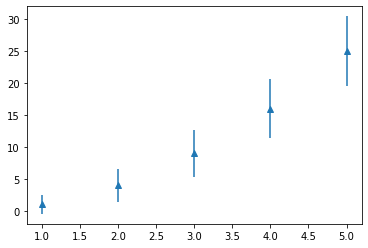

In [199]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()


In [200]:
res = np.histogram(data, bins=np.linspace(10,90,num=17))
print(res)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.]))


In [63]:
print(sum(res[0].tolist()))

15763


In [64]:
result = [i for i in res[0] ]

In [65]:
print(result)

[16, 231, 876, 1846, 2642, 2929, 2581, 1965, 1349, 688, 365, 154, 78, 33, 6, 4]


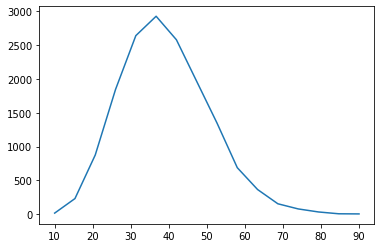

In [76]:
plt.plot(np.linspace(10,90,num=16), result)
plt.show()

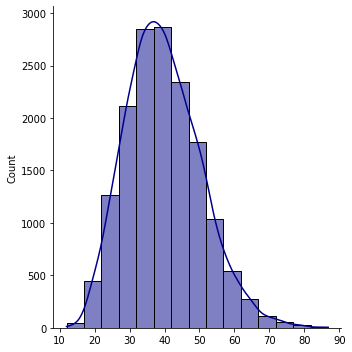

In [74]:
sns.displot(data, kde=True, bins=15,
         color = 'darkblue')

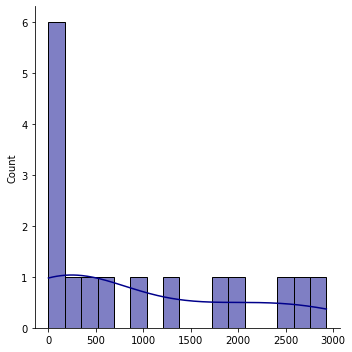

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(10,90,num=16)
y = [i/100 for i in result]
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5, 1, 1, 1, 1, 1, 1,1,1,1,1,1])
plt.figure(figsize=(16,10))

plt.errorbar(x, y, e, marker='.')

plt.show()

NameError: name 'result' is not defined

In [7]:
data = [[] for i in range(16)]

for elt in files:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    histo = np.histogram(raw_df['Min diameter µm'].values.tolist(), bins=np.linspace(10,90,num=17))
    for i in range(16):
        data[i].append(histo[0][i]/sum(histo[0]))
    
print(histo)

(array([ 17, 158, 338, 553, 584, 577, 430, 278, 135,  84,  23,   8,   6,
         2,   0,   0]), array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.]))


In [8]:
data

[[0.0013550135501355014,
  0.0010148849797023004,
  0.0003332222592469177,
  0.0016361256544502618,
  0.00065359477124183,
  0.0005292405398253506,
  0.0006138735420503376,
  0.001115137998327293,
  0.0005485463521667581,
  0.005324146570623238],
 [0.018970189701897018,
  0.01725304465493911,
  0.010663112295901367,
  0.015379581151832461,
  0.010130718954248366,
  0.010055570256681662,
  0.014119091467157766,
  0.021745190967382214,
  0.01151947339550192,
  0.04948324459755716],
 [0.06937669376693767,
  0.07510148849797023,
  0.03698767077640786,
  0.05955497382198953,
  0.03431372549019608,
  0.04339772426567875,
  0.07366482504604052,
  0.10036241984945637,
  0.05787164015359298,
  0.10585656122768557],
 [0.13739837398373983,
  0.14479025710419485,
  0.1016327890703099,
  0.11616492146596859,
  0.08202614379084967,
  0.09288171473934903,
  0.15715162676488642,
  0.15723445776414832,
  0.1269884805266045,
  0.17319135609145006],
 [0.1978319783197832,
  0.18606224627875506,
  0.139953

[12.5 17.5 22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5 72.5 77.5
 82.5 87.5]


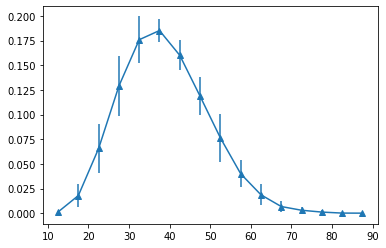

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(12.5,87.5,num=16)
print(x)
y=[]
e=[]
for elt in data:
    y.append(statistics.mean(elt))
    e.append(statistics.stdev(elt))
#plt.figure(figsize=(16,10))
fig,ax = plt.subplots()

ax.errorbar(x, y, e, marker='^')

plt.show()

In [22]:
files1 = ["S11L1-Scene-04-LADc1.czi Annotations.txt", "S12L1-Scene-04-LADc1.czi Annotations.txt", "S13L1-1-Scene-04-LADc1.czi Annotations.txt", "S14L1-1-Scene-04-LADc1.czi Annotations.txt", "S15L1-1-Scene-04-LADc1.czi Annotations.txt", "S16L1-1-Scene-04-LADc1.czi Annotations.txt", "S17L1-1-Scene-04-LADc1.czi Annotations.txt", "S18L1-1-Scene-04-LADc1.czi Annotations.txt", "S19L1-1-Scene-04-LADc1.czi Annotations.txt", "S20L1-1-Scene-04-LADc1.czi Annotations.txt"]
data1 = [[] for i in range(16)]

for elt in files1:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    histo = np.histogram(raw_df['Min diameter µm'].values.tolist(), bins=np.linspace(10,90,num=17))
    for i in range(16):
        data1[i].append(histo[0][i]/sum(histo[0]))
        
        
print(data1)

[[0.001859427296392711, 0.0008240626287597857, 0.0017306028266512836, 0.00039323633503735744, 0.0002838489923360772, 0.0, 0.0006391818472355385, 0.0, 0.0012907389480477573, 0.0006426735218508997], [0.0238006693938267, 0.006592501030078286, 0.015286991635419672, 0.009830908375933936, 0.011637808685779166, 0.008045292014302742, 0.005113454777884308, 0.00784313725490196, 0.01903839948370442, 0.008354755784061696], [0.0792116028263295, 0.03378656777915121, 0.049610614364003464, 0.037750688163586316, 0.059324439398240135, 0.037842669845053634, 0.02588686481303931, 0.03361344537815126, 0.0713133268796386, 0.04048843187660668], [0.14912606917069543, 0.09147095179233622, 0.11479665416786848, 0.09673613841918993, 0.10161793925631564, 0.09773539928486293, 0.07318632150846915, 0.08795518207282914, 0.1264924169086802, 0.10829048843187661], [0.19338043882484196, 0.13391017717346518, 0.15863859244303433, 0.16791191506095163, 0.14760147601476015, 0.1698450536352801, 0.13039309683604985, 0.14509803921

In [23]:
files2 = ["S21L1-1-Scene-04-LADc1.czi Annotations.txt", "S22L1-1-Scene-04-LADc1.czi Annotations.txt", "S23L1-1-Scene-04-LADc1.czi Annotations.txt", "S24L1-1-Scene-04-LADc1.czi Annotations.txt", "S25L1-1-Scene-04-LADc1.czi Annotations.txt", "S26L1-1-Scene-04-LADc1.czi Annotations.txt", "S27L1-1-Scene-04-LADc1.czi Annotations.txt", "S28L1-1-Scene-04-LADc1.czi Annotations.txt", "S29L1-1-Scene-04-LADc1.czi Annotations.txt", "S30L1-1-Scene-04-LADc1.czi Annotations.txt"]
data2 = [[] for i in range(16)]

for elt in files2:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    histo = np.histogram(raw_df['Min diameter µm'].values.tolist(), bins=np.linspace(10,90,num=17))
    for i in range(16):
        data2[i].append(histo[0][i]/sum(histo[0]))
        
        
print(data2)

[[0.0004222972972972973, 0.002758620689655172, 0.0034934497816593887, 0.001052262364082778, 0.0006383657835939994, 0.0009523809523809524, 0.001633097441480675, 0.0, 0.0, 0.0], [0.004222972972972973, 0.012758620689655173, 0.03580786026200873, 0.020343739038933707, 0.0063836578359399935, 0.005238095238095238, 0.00979858464888405, 0.009363295880149813, 0.015748031496062992, 0.010752688172043012], [0.033783783783783786, 0.05931034482758621, 0.09956331877729258, 0.049456331111890565, 0.025853814235556973, 0.02095238095238095, 0.03647250952640174, 0.041666666666666664, 0.04921259842519685, 0.041707396546106223], [0.08614864864864864, 0.1006896551724138, 0.16943231441048034, 0.10627849877236058, 0.061283115225023936, 0.0761904761904762, 0.09689711486118671, 0.08707865168539326, 0.09448818897637795, 0.10654936461388075], [0.16089527027027026, 0.18344827586206897, 0.1970887918486172, 0.15854086285513855, 0.11107564634535588, 0.14285714285714285, 0.1769188894937398, 0.1750936329588015, 0.1590551

In [24]:
files3 = ["S31L1-1-Scene-04-LADc1.czi Annotations.txt", "S32L1-1-Scene-04-LADc1.czi Annotations.txt", "S33L1-Scene-04-LADc1.czi Annotations.txt", "S34L1-Scene-04-LADc1.czi Annotations.txt", "S35L1-Scene-04-LADc1.czi Annotations.txt", "S36L1-Scene-04-LADc1.czi Annotations.txt", "S37L1-Scene-01-LADc1.czi Annotations.txt", "S38L1-Scene-04-LADc1.czi Annotations.txt", "S39L1-Scene-04-LADc1.czi Annotations.txt", "S40L1-Scene-04-LADc1.czi Annotations.txt"]
data3 = [[] for i in range(16)]

for elt in files3:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    histo = np.histogram(raw_df['Min diameter µm'].values.tolist(), bins=np.linspace(10,90,num=17))
    for i in range(16):
        data3[i].append(histo[0][i]/sum(histo[0]))
        
        
print(data3)

[[0.0, 0.0, 0.0, 0.0013932427725531174, 0.0006849315068493151, 0.0015785319652722968, 0.0, 0.0, 0.002271436683702442, 0.0], [0.0034557235421166306, 0.0035971223021582736, 0.01067140951534015, 0.008359456635318705, 0.01643835616438356, 0.0244672454617206, 0.004123711340206186, 0.006584362139917695, 0.019875070982396367, 0.01713796058269066], [0.024190064794816415, 0.020554984583761562, 0.06136060471320587, 0.03622431208638105, 0.05273972602739726, 0.08602999210734018, 0.032989690721649485, 0.05102880658436214, 0.07382169222032936, 0.060411311053984576], [0.07516198704103672, 0.052415210688591986, 0.11160515784793242, 0.09926854754440961, 0.0773972602739726, 0.13496448303078137, 0.09072164948453608, 0.1111111111111111, 0.13515048268029528, 0.1328191945158526], [0.13952483801295895, 0.07656731757451182, 0.15518008003557138, 0.14594218042493903, 0.13904109589041097, 0.18074191002367798, 0.1360824742268041, 0.1991769547325103, 0.16808631459398068, 0.18766066838046272], [0.18704103671706263,

In [188]:
files4 = ["S41L1-Scene-04-LADc1.czi Annotations.txt", "S42L1-Scene-04-LADc1.czi Annotations.txt", "S43L1-Scene-04-LADc1.czi Annotations.txt", "S44L1-Scene-04-LADc1.czi Annotations.txt", "S45L1-Scene-04-LADc1.czi Annotations.txt", "S46L1-Scene-04-LADc1.czi Annotations.txt", "S47L1-Scene-04-LADc1.czi Annotations.txt", "S48L1-Scene-04-LADc1.czi Annotations.txt", "S49L1-Scene-04-LADc1.czi Annotations.txt", "S50L1-Scene-04-LADc1.czi Annotations.txt"]
data4 = [[] for i in range(16)]

for elt in files4:
    raw_df = pd.read_csv(directory + elt, delimiter="\t", usecols=[0,2,11])
    histo = np.histogram(raw_df['Min diameter µm'].values.tolist(), bins=np.linspace(10,90,num=17))
    for i in range(16):
        data4[i].append(histo[0][i]/sum(histo[0]))
        
        
print(data4)

(array([  7,  67, 273, 570, 654, 595, 487, 388, 258, 145,  57,   7,   0,
         1,   0,   0]), array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.]))
(array([  6, 101, 310, 577, 591, 515, 332, 208,  87,  24,   4,   2,   2,
         0,   0,   0]), array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.]))
(array([  8,  99, 337, 663, 713, 650, 490, 347, 173,  69,  12,   2,   0,
         0,   0,   0]), array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.]))
(array([  5,  50, 249, 435, 538, 433, 385, 264, 187,  70,  15,   7,   0,
         0,   0,   0]), array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.]))
(array([  1,  37, 125, 268, 446, 403, 348, 315, 271, 146,  51,  16,   0,
         0,   0,   0]), array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.]))
(array([  

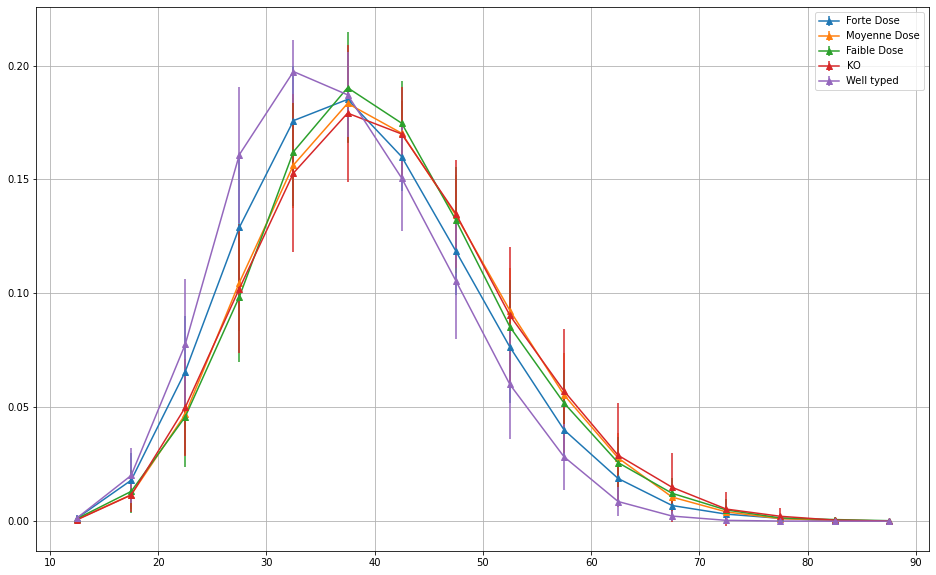

In [26]:

x = np.linspace(12.5,87.5,num=16)
y1=[]
e1=[]
for elt in data1:
    y1.append(statistics.mean(elt))
    e1.append(statistics.stdev(elt))
    
y2=[]
e2=[]      
for elt in data2:
    y2.append(statistics.mean(elt))
    e2.append(statistics.stdev(elt))

y3=[]
e3=[]      
for elt in data3:
    y3.append(statistics.mean(elt))
    e3.append(statistics.stdev(elt))
    
y4=[]
e4=[]      
for elt in data4:
    y4.append(statistics.mean(elt))
    e4.append(statistics.stdev(elt))

    
#plt.figure(figsize=(16,10))
fig,ax = plt.subplots(figsize=(16,10))

ax.errorbar(x, y, e, marker='^', label="Forte Dose")
ax.errorbar(x, y1, e1, marker='^', label="Moyenne Dose")
ax.errorbar(x, y2, e2, marker='^', label="Faible Dose")
ax.errorbar(x, y3, e3, marker='^', label="KO")
ax.errorbar(x, y4, e4, marker='^', label="Well typed")
ax.grid()
ax.legend()

plt.show()

In [2]:
#patterns = ['LADc1', 'LPDc1', 'QUADc1', 'GLUDc1', 'PSODc1', 'TRIDc1', 'DELDc1']
#patterns = ['LADc1']
#patterns = ['PSODc1']
#patterns = ['GLUDc1']
#patterns = ['QUADc1']
#patterns = ['TRIDc1']
#patterns = ['DELDc1']
patterns=['PSODc']


In [3]:
import os
import glob

#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_classifier_three/InfDiam_Centro_results/"
directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_blue45/InfDiam_Centro_results/"

#filesLimit = glob.glob(directory + "S[0-9]0*LADc1.czi Annotations.txt")
#filesLAD = glob.glob(directory + "S[0-9]L*LADc1.czi Annotations.txt") 
#filesLAD.append(filesLimit[0])

files = {}


for pattern in patterns:  
    print(pattern)
    files[pattern] = []
    #print(files[pattern])
    #print(files)

    
    for i in range(5):
        if i > 0:
            files[pattern].append(glob.glob(directory + "S"+str(i)+"[1-9]*" + pattern + "[1-3].czi Annotations.txt"))
            files[pattern][i].append(glob.glob(directory + "S" + str(i+1) +  "0*" + pattern + "[1-3].czi Annotations.txt")[0])  
        else :
            files[pattern].append(glob.glob(directory + "S[1-9]L*" + pattern + "[1-3].czi Annotations.txt"))
            files[pattern][i].append(glob.glob(directory + "S" + str(i+1) +  "0*" + pattern + "[1-3].czi Annotations.txt")[0])
        #print(files[pattern])
        filenames=[]   
        for filename in files[pattern][i] :
            filenames.append(os.path.basename(filename)  )
        files[pattern][i]=filenames
    
    
print(files)





PSODc
{'PSODc': [['S1L2-Scene-11-PSODc2.czi Annotations.txt', 'S9L2-1-Scene-11-PSODc2.czi Annotations.txt', 'S7L2-1-Scene-12-PSODc3.czi Annotations.txt', 'S2L2-Scene-10-PSODc1.czi Annotations.txt', 'S3L2-Scene-11-PSODc2.czi Annotations.txt', 'S4L2-Scene-11-PSODc2.czi Annotations.txt', 'S8L2-1-Scene-12-PSODc3.czi Annotations.txt', 'S5L2-1-Scene-11-PSODc2.czi Annotations.txt', 'S6L2-1-Scene-11-PSODc2.czi Annotations.txt', 'S10L2-1-Scene-12-PSODc3.czi Annotations.txt'], ['S14L2-1-Scene-10-PSODc1.czi Annotations.txt', 'S17L2-1-Scene-12-PSODc3.czi Annotations.txt', 'S13L2-1-Scene-12-PSODc3.czi Annotations.txt', 'S18L2-1-Scene-12-PSODc3.czi Annotations.txt', 'S15L2-1-Scene-11-PSODc2.czi Annotations.txt', 'S19L2-1-Scene-11-PSODc2.czi Annotations.txt', 'S12L2-Scene-12-PSODc3.czi Annotations.txt', 'S11L2-Scene-11-PSODc2.czi Annotations.txt', 'S16L2-1-Scene-12-PSODc3.czi Annotations.txt', 'S20L2-1-Scene-12-PSODc3.czi Annotations.txt'], ['S28L2-1-Scene-11-PSODc2.czi Annotations.txt', 'S27L2-1-Sce

In [3]:
files['LADc1'][4].remove('S46L1-Scene-04-LADc1.czi Annotations.txt')

KeyError: 'LADc1'

In [89]:
files['PSODc1'][4].remove('S49L2-Scene-10-PSODc1.czi Annotations.txt')

In [23]:
files['PSODc1'][4].remove('S47L2-Scene-10-PSODc1.czi Annotations.txt')

In [126]:
files['PSODc1'][3].remove('S37L2-Scene-4-PSODc1.czi Annotations.txt')

In [23]:
files['PSODc'][1].remove('S12L2-Scene-12-PSODc3.czi Annotations.txt')

In [35]:
files['PSODc'][0].remove('S5L2-1-Scene-11-PSODc2.czi Annotations.txt')

In [113]:
files['PSODc1'][3].remove('S32L2-1-Scene-10-PSODc1.czi Annotations.txt')

In [72]:
files={}
files['LADc1'] = [ ['S40L1-Scene-04-LADc1.czi Annotations.txt', 'S39L1-Scene-04-LADc1.czi Annotations.txt', 'S38L1-Scene-04-LADc1.czi Annotations.txt', 'S37L1-Scene-01-LADc1.czi Annotations.txt', 'S36L1-Scene-04-LADc1.czi Annotations.txt', 'S35L1-Scene-04-LADc1.czi Annotations.txt', 'S34L1-Scene-04-LADc1.czi Annotations.txt','S33L1-Scene-04-LADc1.czi Annotations.txt', 'S32L1-1-Scene-04-LADc1.czi Annotations.txt', 'S31L1-1-Scene-04-LADc1.czi Annotations.txt'], ['S43L1-Scene-04-LADc1.czi Annotations.txt', 'S41L1-Scene-04-LADc1.czi Annotations.txt', 'S44L1-Scene-04-LADc1.czi Annotations.txt', 'S48L1-Scene-04-LADc1.czi Annotations.txt',
'S42L1-Scene-04-LADc1.czi Annotations.txt', 'S47L1-Scene-04-LADc1.czi Annotations.txt', 'S50L1-Scene-04-LADc1.czi Annotations.txt', 'S45L1-Scene-04-LADc1.czi Annotations.txt', 'S49L1-Scene-04-LADc1.czi Annotations.txt']]
#'S46L1-Scene-04-LADc1.czi Annotations.txt',

print(files)

{'LADc1': [['S40L1-Scene-04-LADc1.czi Annotations.txt', 'S39L1-Scene-04-LADc1.czi Annotations.txt', 'S38L1-Scene-04-LADc1.czi Annotations.txt', 'S37L1-Scene-01-LADc1.czi Annotations.txt', 'S36L1-Scene-04-LADc1.czi Annotations.txt', 'S35L1-Scene-04-LADc1.czi Annotations.txt', 'S34L1-Scene-04-LADc1.czi Annotations.txt', 'S33L1-Scene-04-LADc1.czi Annotations.txt', 'S32L1-1-Scene-04-LADc1.czi Annotations.txt', 'S31L1-1-Scene-04-LADc1.czi Annotations.txt'], ['S43L1-Scene-04-LADc1.czi Annotations.txt', 'S41L1-Scene-04-LADc1.czi Annotations.txt', 'S44L1-Scene-04-LADc1.czi Annotations.txt', 'S48L1-Scene-04-LADc1.czi Annotations.txt', 'S42L1-Scene-04-LADc1.czi Annotations.txt', 'S47L1-Scene-04-LADc1.czi Annotations.txt', 'S50L1-Scene-04-LADc1.czi Annotations.txt', 'S45L1-Scene-04-LADc1.czi Annotations.txt', 'S49L1-Scene-04-LADc1.czi Annotations.txt']]}


In [73]:
files={}
files['TRIDc1'] = [ ['S40L3-Scene-04-TRIDc1.czi Annotations.txt', 'S39L3-Scene-04-TRIDc1.czi Annotations.txt', 'S38L3-Scene-04-TRIDc1.czi Annotations.txt', 'S37L3-Scene-01-TRIDc1.czi Annotations.txt', 'S36L3-Scene-04-TRIDc1.czi Annotations.txt', 'S35L3-Scene-04-TRIDc1.czi Annotations.txt', 'S34L3-Scene-04-TRIDc1.czi Annotations.txt','S33L3-Scene-04-TRIDc1.czi Annotations.txt', 'S32L3-1-Scene-04-TRIDc1.czi Annotations.txt', 'S31L3-1-Scene-04-TRIDc1.czi Annotations.txt'], ['S43L3-Scene-04-TRIDc1.czi Annotations.txt', 'S41L3-Scene-04-TRIDc1.czi Annotations.txt', 'S44L3-Scene-04-TRIDc1.czi Annotations.txt', 'S48L3-Scene-04-TRIDc1.czi Annotations.txt',
'S42L3-Scene-04-TRIDc1.czi Annotations.txt', 'S47L1-Scene-04-LADc1.czi Annotations.txt', 'S45L3-Scene-04-TRIDc1.czi Annotations.txt', 'S46L3-Scene-04-TRIDc1.czi Annotations.txt', 'S50L3-Scene-04-TRIDc1.czi Annotations.txt', 'S49L3-Scene-04-TRIDc1.czi Annotations.txt']]
#'S46L1-Scene-04-LADc1.czi Annotations.txt',

print(len(files['TRIDc1'][0]))

10


In [74]:
files={}
files['QUADc1'] = [ ['S39L1-Scene-16-QUADc1.czi Annotations.txt', 'S38L1-Scene-16-QUADc1.czi Annotations.txt', 'S37L1-Scene-07-QUADc1.czi Annotations.txt', 'S36L1-Scene-16-QUADc1.czi Annotations.txt', 'S35L1-Scene-16-QUADc1.czi Annotations.txt', 'S34L1-Scene-16-QUADc1.czi Annotations.txt','S33L1-Scene-16-QUADc1.czi Annotations.txt', 'S32L1-1-Scene-16-QUADc1.czi Annotations.txt', 'S31L1-1-Scene-16-QUADc1.czi Annotations.txt'], ['S43L1-Scene-16-QUADc1.czi Annotations.txt', 'S46L1-Scene-16-QUADc1.czi Annotations.txt',
'S41L1-Scene-16-QUADc1.czi Annotations.txt', 'S45L1-Scene-04-LADc1.czi Annotations.txt','S44L1-Scene-16-QUADc1.czi Annotations.txt', 'S48L1-Scene-16-QUADc1.czi Annotations.txt',
'S42L1-Scene-16-QUADc1.czi Annotations.txt', 'S49L1-Scene-16-QUADc1.czi Annotations.txt']]
#
print(files)

{'QUADc1': [['S39L1-Scene-16-QUADc1.czi Annotations.txt', 'S38L1-Scene-16-QUADc1.czi Annotations.txt', 'S37L1-Scene-07-QUADc1.czi Annotations.txt', 'S36L1-Scene-16-QUADc1.czi Annotations.txt', 'S35L1-Scene-16-QUADc1.czi Annotations.txt', 'S34L1-Scene-16-QUADc1.czi Annotations.txt', 'S33L1-Scene-16-QUADc1.czi Annotations.txt', 'S32L1-1-Scene-16-QUADc1.czi Annotations.txt', 'S31L1-1-Scene-16-QUADc1.czi Annotations.txt'], ['S43L1-Scene-16-QUADc1.czi Annotations.txt', 'S46L1-Scene-16-QUADc1.czi Annotations.txt', 'S41L1-Scene-16-QUADc1.czi Annotations.txt', 'S45L1-Scene-04-LADc1.czi Annotations.txt', 'S44L1-Scene-16-QUADc1.czi Annotations.txt', 'S48L1-Scene-16-QUADc1.czi Annotations.txt', 'S42L1-Scene-16-QUADc1.czi Annotations.txt', 'S49L1-Scene-16-QUADc1.czi Annotations.txt']]}


In [75]:
files={}
files['PSODc1'] = [ ['S40L2-Scene-10-PSODc1.czi Annotations.txt','S39L2-Scene-10-PSODc1.czi Annotations.txt', 'S38L2-Scene-10-PSODc1.czi Annotations.txt', 'S37L2-Scene-4-PSODc1.czi Annotations.txt', 'S36L2-Scene-10-PSODc1.czi Annotations.txt', 'S35L2-Scene-10-PSODc1.czi Annotations.txt', 'S34L2-Scene-10-PSODc1.czi Annotations.txt','S33L2-Scene-10-PSODc1.czi Annotations.txt', 'S32L2-1-Scene-10-PSODc1.czi Annotations.txt', 'S31L2-1-Scene-10-PSODc1.czi Annotations.txt'], ['S43L2-Scene-10-PSODc1.czi Annotations.txt', 'S46L2-Scene-10-PSODc1.czi Annotations.txt',
'S41L2-Scene-10-PSODc1.czi Annotations.txt', 'S44L2-Scene-10-PSODc1.czi Annotations.txt', 'S48L2-Scene-10-PSODc1.czi Annotations.txt',
'S42L2-Scene-10-PSODc1.czi Annotations.txt', 'S45L2-Scene-10-PSODc1.czi Annotations.txt', 'S47L2-Scene-10-PSODc1.czi Annotations.txt', 'S50L2-Scene-10-PSODc1.czi Annotations.txt']]#,  'S49L2-Scene-10-PSODc1.czi Annotations.txt']]

print(len(files['PSODc1'][1]))

9


In [76]:
files={}
files['GLUDc1'] = [ ['S40L2-Scene-04-GLUDc1.czi Annotations.txt',
    'S39L2-Scene-04-GLUDc1.czi Annotations.txt', 'S38L2-Scene-04-GLUDc1.czi Annotations.txt', 
                     'S37L2-Scene-1-GLUDc1.czi Annotations.txt', 'S36L2-Scene-04-GLUDc1.czi Annotations.txt', 
                     'S35L2-Scene-04-GLUDc1.czi Annotations.txt', 'S34L2-Scene-04-GLUDc1.czi Annotations.txt',
                     'S33L2-Scene-04-GLUDc1.czi Annotations.txt', 'S32L2-1-Scene-04-GLUDc1.czi Annotations.txt', 
                     ], ['S46L2-Scene-04-GLUDc1.czi Annotations.txt', 'S43L2-Scene-04-GLUDc1.czi Annotations.txt',
'S41L2-Scene-04-GLUDc1.czi Annotations.txt', 'S44L2-Scene-04-GLUDc1.czi Annotations.txt', 'S48L2-Scene-04-GLUDc1.czi Annotations.txt',
'S42L2-Scene-04-GLUDc1.czi Annotations.txt', 'S45L2-Scene-04-GLUDc1.czi Annotations.txt', 'S47L2-Scene-04-GLUDc1.czi Annotations.txt','S49L2-Scene-04-GLUDc1.czi Annotations.txt']]

#'S50L2-Scene-04-GLUDc1.czi Annotations.txt','S31L2-1-Scene-04-GLUDc1.czi Annotations.txt'

print(len(files['GLUDc1'][1]))

9


In [77]:
files={}
files['DELDc1'] = [ ['S40L3-Scene-10-DELDc1.czi Annotations.txt','S39L3-Scene-10-DELDc1.czi Annotations.txt', 'S38L3-Scene-10-DELDc1.czi Annotations.txt', 'S37L3-Scene-04-DELDc1.czi Annotations.txt', 'S36L3-Scene-10-DELDc1.czi Annotations.txt', 'S35L3-Scene-10-DELDc1.czi Annotations.txt', 'S34L3-Scene-10-DELDc1.czi Annotations.txt','S33L3-Scene-10-DELDc1.czi Annotations.txt', 'S32L3-1-Scene-10-DELDc1.czi Annotations.txt', 'S31L3-1-Scene-10-DELDc1.czi Annotations.txt'], ['S43L3-Scene-10-DELDc1.czi Annotations.txt', 'S41L3-Scene-10-DELDc1.czi Annotations.txt', 'S44L3-Scene-10-DELDc1.czi Annotations.txt', 'S48L3-Scene-10-DELDc1.czi Annotations.txt',
'S42L3-Scene-10-DELDc1.czi Annotations.txt', 'S46L3-Scene-10-DELDc1.czi Annotations.txt', 'S45L3-Scene-10-DELDc1.czi Annotations.txt', 'S47L3-Scene-10-DELDc1.czi Annotations.txt', 'S49L3-Scene-10-DELDc1.czi Annotations.txt']]

#'S50L3-Scene-10-DELDc1.czi Annotations.txt', 
print(len(files['DELDc1'][0]))

10


In [78]:
files={}
files['LADc1'] = [
    ['S33L1-Scene-04-LADc1.czi Annotations.txt', 'S34L1-Scene-04-LADc1.czi Annotations.txt', 'S35L1-Scene-04-LADc1.czi Annotations.txt', 'S36L1-Scene-04-LADc1.czi Annotations.txt', 'S37L1-Scene-01-LADc1.czi Annotations.txt', 'S39L1-Scene-04-LADc1.czi Annotations.txt', 'S38L1-Scene-04-LADc1.czi Annotations.txt', 'S40L1-Scene-04-LADc1.czi Annotations.txt'], 
    ['S43L1-Scene-04-LADc1.czi Annotations.txt',  'S42L1-Scene-04-LADc1.czi Annotations.txt', 'S45L1-Scene-04-LADc1.czi Annotations.txt','S44L1-Scene-04-LADc1.czi Annotations.txt', 'S47L1-Scene-04-LADc1.czi Annotations.txt', 'S48L1-Scene-04-LADc1.czi Annotations.txt', 'S49L1-Scene-04-LADc1.czi Annotations.txt', 'S50L1-Scene-04-LADc1.czi Annotations.txt'],

]
# 


In [4]:
def centro_rate(df, col_name):
    centro = 0
    if 'Centro' in df[col_name].values:
        centro = df[col_name].value_counts()['Centro']
    normales = df[col_name].value_counts()['Normale']
    return centro/(centro+normales)


def histo_min_dia_normalised(df, data, min_value, max_value, bin_number):
    data=[[] for i in range(16)]
    histo = np.histogram(df['Min diameter µm'].values.tolist(), bins=np.linspace(min_value,max_value,num=bin_number))
    for i in range(bin_number-1):
        data[i].append(histo[0][i]/sum(histo[0]))
    return data
        


S1L2-Scene-11-PSODc2.czi Annotations.txt
S9L2-1-Scene-11-PSODc2.czi Annotations.txt
S7L2-1-Scene-12-PSODc3.czi Annotations.txt
S2L2-Scene-10-PSODc1.czi Annotations.txt
S3L2-Scene-11-PSODc2.czi Annotations.txt
S4L2-Scene-11-PSODc2.czi Annotations.txt
S8L2-1-Scene-12-PSODc3.czi Annotations.txt
S5L2-1-Scene-11-PSODc2.czi Annotations.txt
S6L2-1-Scene-11-PSODc2.czi Annotations.txt
S10L2-1-Scene-12-PSODc3.czi Annotations.txt
S14L2-1-Scene-10-PSODc1.czi Annotations.txt
S17L2-1-Scene-12-PSODc3.czi Annotations.txt
S13L2-1-Scene-12-PSODc3.czi Annotations.txt
S18L2-1-Scene-12-PSODc3.czi Annotations.txt
S15L2-1-Scene-11-PSODc2.czi Annotations.txt
S19L2-1-Scene-11-PSODc2.czi Annotations.txt
S12L2-Scene-12-PSODc3.czi Annotations.txt
S11L2-Scene-11-PSODc2.czi Annotations.txt
S16L2-1-Scene-12-PSODc3.czi Annotations.txt
S20L2-1-Scene-12-PSODc3.czi Annotations.txt
S28L2-1-Scene-11-PSODc2.czi Annotations.txt
S27L2-1-Scene-10-PSODc1.czi Annotations.txt
S26L2-1-Scene-10-PSODc1.czi Annotations.txt
S25L2-1-S

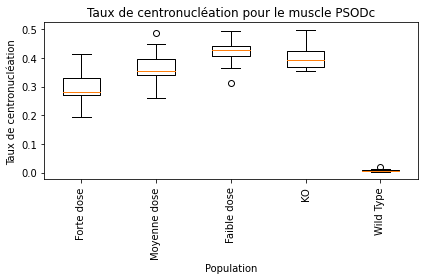

In [10]:
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_measures_new/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_blue45/InfDiam_Centro_results_red_diam35/"
directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_fragmented_retrained/InfDiam_Centro_results/"

    
for pattern in patterns: 
    centro_patt = []
    for i in range(len(files[pattern])):
        centro_rates=[]
        for file in files[pattern][i]:
            print(file)
            raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,11])
            centro_rates.append(centro_rate(raw_df, 'Class'))
        centro_patt.append(centro_rates)      

        
    fig7, ax7 = plt.subplots()
    ax7.set_title(f'Taux de centronucléation pour le muscle {pattern}')
    ax7.boxplot(centro_patt)
    ax7.set_xlabel("Population")
    ax7.set_ylabel("Taux de centronucléation")
    axes = plt.gca() 
    axes.xaxis.set_ticklabels(['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type'], rotation = 90)
    #axes.xaxis.set_ticklabels(['KO', 'Wild Type'], rotation = 90)
    plt.tight_layout()

    plt.savefig(f'Taux_centronucleation_{pattern}_diam35_ft05')
    plt.show()
    
    




S1L2-Scene-11-PSODc2.czi Annotations.txt
S9L2-1-Scene-11-PSODc2.czi Annotations.txt
S7L2-1-Scene-12-PSODc3.czi Annotations.txt
S2L2-Scene-10-PSODc1.czi Annotations.txt
S3L2-Scene-11-PSODc2.czi Annotations.txt
S4L2-Scene-11-PSODc2.czi Annotations.txt
S8L2-1-Scene-12-PSODc3.czi Annotations.txt
S5L2-1-Scene-11-PSODc2.czi Annotations.txt
S6L2-1-Scene-11-PSODc2.czi Annotations.txt
S10L2-1-Scene-12-PSODc3.czi Annotations.txt
S14L2-1-Scene-10-PSODc1.czi Annotations.txt
S17L2-1-Scene-12-PSODc3.czi Annotations.txt
S13L2-1-Scene-12-PSODc3.czi Annotations.txt
S18L2-1-Scene-12-PSODc3.czi Annotations.txt
S15L2-1-Scene-11-PSODc2.czi Annotations.txt
S19L2-1-Scene-11-PSODc2.czi Annotations.txt
S12L2-Scene-12-PSODc3.czi Annotations.txt
S11L2-Scene-11-PSODc2.czi Annotations.txt
S16L2-1-Scene-12-PSODc3.czi Annotations.txt
S20L2-1-Scene-12-PSODc3.czi Annotations.txt
S28L2-1-Scene-11-PSODc2.czi Annotations.txt
S27L2-1-Scene-10-PSODc1.czi Annotations.txt
S26L2-1-Scene-10-PSODc1.czi Annotations.txt
S25L2-1-S

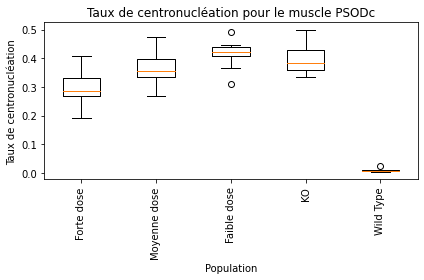

   Wild Type        KO  Lowest dose  Intermediate dose  Highest dose
0   0.007524  0.371484     0.406702           0.445714      0.274641
1   0.004487  0.500155     0.364215           0.339232      0.235928
2   0.002098  0.356637     0.408759           0.399606      0.278155
3   0.022896  0.447841     0.416549           0.352050      0.191136
4   0.010781  0.384830     0.439292           0.267450      0.268279
5   0.008088  0.334702     0.440961           0.357043      0.382561
6   0.004719  0.415878     0.428329           0.474626      0.331220
7   0.007651  0.354380     0.308895           0.333648      0.324415
8   0.009960  0.381559     0.492356           0.321947      0.407510
9   0.010603  0.431313     0.445853           0.397147      0.291800
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Wild Type v.s. KO: Custom statistical test, P_val:6.976e-06
KO v.s. Lowest do

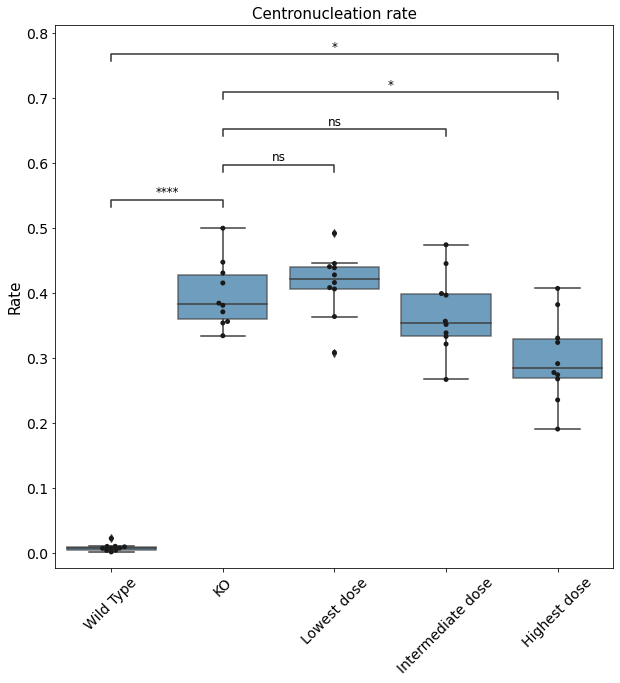

In [9]:
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_measures_new/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures/InfDiam_Centro_results/" 
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_classifier_three/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_blue45/InfDiam_Centro_results_red_diam35/"
directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_fragmented_retrained/InfDiam_Centro_results/"


    
for pattern in patterns: 
    centro_patt = []
    for i in range(len(files[pattern])):
        centro_rates=[]
        for file in files[pattern][i]:
            print(file)
            raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,11])
            centro_rates.append(centro_rate(raw_df, 'Class'))
        centro_patt.append(centro_rates)      

        
    fig7, ax7 = plt.subplots()
    ax7.set_title(f'Taux de centronucléation pour le muscle {pattern}')
    ax7.boxplot(centro_patt)
    ax7.set_xlabel("Population")
    ax7.set_ylabel("Taux de centronucléation")
    axes = plt.gca() 
    axes.xaxis.set_ticklabels(['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type'], rotation = 90)
    #axes.xaxis.set_ticklabels(['KO', 'Wild Type'], rotation = 90)
    plt.tight_layout()

    plt.savefig(f'Taux_centronucleation_{pattern}_diam35_ft05')
    plt.show()
    
    fig, ax=plt.subplots(figsize=(10,10))
    df  = pd.DataFrame(centro_patt)
    df = df.transpose()
    df.columns = ['Highest dose', 'Intermediate dose', 'Lowest dose', 'KO', 'Wild Type']
    
    
    df = df[[ 'Wild Type', 'KO', 'Lowest dose', 'Intermediate dose', 'Highest dose']]
    #df.columns = ['KO', 'Wild Type']
    print(df)
    #df['Type'] = ['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type']
    
    df.to_csv("Centro.csv")
    ax= sns.boxplot(data=df, color="tab:blue", boxprops=dict(alpha=.7))
    ax = sns.swarmplot(data=df, color=".1")  
    ax.set_ylabel("Rate", fontsize=15)
    ax.set_title("Centronucleation rate", fontsize=15)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14, rotation=45)
    
    plt.yticks(fontsize=14)
    
    add_stat_annotation(ax, data=df, perform_stat_test=False, fontsize='large',
                    box_pairs=[("KO", "Wild Type"),("Highest dose", "KO"), ("Highest dose", "Wild Type"), ("Intermediate dose", "KO"), ("Lowest dose", "KO")],
                    pvalues=[res1[2][1],res1[3][2],res1[3][1],res1[4][2],res1[5][2]], text_format='star', loc='inside', verbose=2)
    
    plt.savefig('Centronucleation_rate_fragmented.pdf', bbox_inches='tight')  




In [7]:
kruskal(df["Wild Type"], df["KO"], df["Highest dose"], df["Intermediate dose"], df["Lowest dose"], nan_policy='omit', )

KruskalResult(statistic=33.09835294117647, pvalue=1.140356703685871e-06)

In [8]:
res1 = posthoc_dunn([df["Wild Type"], df["KO"], df["Highest dose"], df["Intermediate dose"], df["Lowest dose"]])

In [10]:
print(res1)

              1         2         3         4             5
1  1.000000e+00  0.000007  0.031753  0.000261  4.496718e-07
2  6.976152e-06  1.000000  0.018930  0.398859  5.808012e-01
3  3.175334e-02  0.018930  1.000000  0.132774  3.742025e-03
4  2.614723e-04  0.398859  0.132774  1.000000  1.627518e-01
5  4.496718e-07  0.580801  0.003742  0.162752  1.000000e+00


S1L2-Scene-11-PSODc2.czi Annotations.txt
S9L2-1-Scene-11-PSODc2.czi Annotations.txt
S7L2-1-Scene-12-PSODc3.czi Annotations.txt
S2L2-Scene-10-PSODc1.czi Annotations.txt
S3L2-Scene-11-PSODc2.czi Annotations.txt
S4L2-Scene-11-PSODc2.czi Annotations.txt
S8L2-1-Scene-12-PSODc3.czi Annotations.txt
S5L2-1-Scene-11-PSODc2.czi Annotations.txt
S6L2-1-Scene-11-PSODc2.czi Annotations.txt
S10L2-1-Scene-12-PSODc3.czi Annotations.txt
S14L2-1-Scene-10-PSODc1.czi Annotations.txt
S17L2-1-Scene-12-PSODc3.czi Annotations.txt
S13L2-1-Scene-12-PSODc3.czi Annotations.txt
S18L2-1-Scene-12-PSODc3.czi Annotations.txt
S15L2-1-Scene-11-PSODc2.czi Annotations.txt
S19L2-1-Scene-11-PSODc2.czi Annotations.txt
S12L2-Scene-12-PSODc3.czi Annotations.txt
S11L2-Scene-11-PSODc2.czi Annotations.txt
S16L2-1-Scene-12-PSODc3.czi Annotations.txt
S20L2-1-Scene-12-PSODc3.czi Annotations.txt
S28L2-1-Scene-11-PSODc2.czi Annotations.txt
S27L2-1-Scene-10-PSODc1.czi Annotations.txt
S26L2-1-Scene-10-PSODc1.czi Annotations.txt
S25L2-1-S

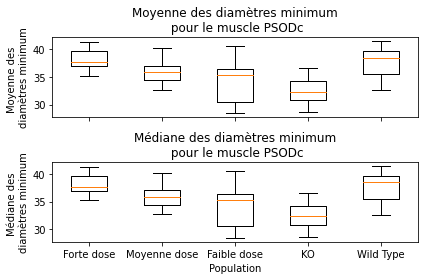

In [16]:
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_measures_new/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures/InfDiam_Centro_results/" 
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_blue45/InfDiam_Centro_results/"
directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_fragmented_retrained/InfDiam_Centro_results/"

    
    
for pattern in patterns: 
    mean_patt = []
    median_patt=[]
    for i in range(len(files[pattern])):
        means=[]
        medians=[]
        for file in files[pattern][i]:
            print(file)
            raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,11])
            means.append(raw_df['Min diameter µm'].mean())
            medians.append(raw_df['Min diameter µm'].median())
        mean_patt.append(means) 
        median_patt.append(medians)

        
    fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
    ax1.set_title(f'Moyenne des diamètres minimum\n pour le muscle {pattern}')
    ax1.boxplot(mean_patt)
    #ax1.set_xlabel("Population")
    ax1.set_ylabel("Moyenne des \ndiamètres minimum")
    
    ax2.set_title(f'Médiane des diamètres minimum\n pour le muscle {pattern}')
    ax2.boxplot(mean_patt)
    ax2.set_xlabel("Population")
    ax2.set_ylabel("Médiane des \ndiamètres minimum")
    
    axes = plt.gca() 
    #axes.xaxis.set_ticklabels(['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type'], rotation = 90)
    #axes.xaxis.set_ticklabels(['KO', 'Wild Type'], rotation = 90)
    
    
    plt.setp((ax1,ax2), xticks=[1,2,3,4,5],
         xticklabels=['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type'])
    plt.tight_layout()

    plt.savefig(f'Mediane_moyenne_{pattern}_diam35_ft05')
    plt.show()
    
    




S1L2-Scene-11-PSODc2.czi Annotations.txt
37.2195
S9L2-1-Scene-11-PSODc2.czi Annotations.txt
36.6799
S7L2-1-Scene-12-PSODc3.czi Annotations.txt
41.3708
S2L2-Scene-10-PSODc1.czi Annotations.txt
35.1862
S3L2-Scene-11-PSODc2.czi Annotations.txt
39.20735
S4L2-Scene-11-PSODc2.czi Annotations.txt
39.8763
S8L2-1-Scene-12-PSODc3.czi Annotations.txt
36.7552
S5L2-1-Scene-11-PSODc2.czi Annotations.txt
37.61685
S6L2-1-Scene-11-PSODc2.czi Annotations.txt
37.2712
S10L2-1-Scene-12-PSODc3.czi Annotations.txt
33.6023
S14L2-1-Scene-10-PSODc1.czi Annotations.txt
33.0707
S17L2-1-Scene-12-PSODc3.czi Annotations.txt
36.6008
S13L2-1-Scene-12-PSODc3.czi Annotations.txt
31.7361
S18L2-1-Scene-12-PSODc3.czi Annotations.txt
34.7455
S15L2-1-Scene-11-PSODc2.czi Annotations.txt
35.8208
S19L2-1-Scene-11-PSODc2.czi Annotations.txt
34.1182
S12L2-Scene-12-PSODc3.czi Annotations.txt
39.7351
S11L2-Scene-11-PSODc2.czi Annotations.txt
37.0025
S16L2-1-Scene-12-PSODc3.czi Annotations.txt
30.2412
S20L2-1-Scene-12-PSODc3.czi Ann

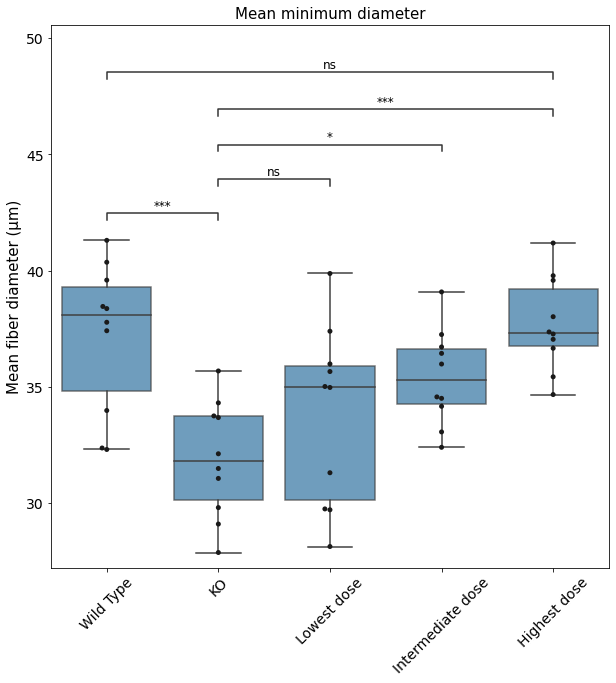

In [14]:
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_measures_new/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_measures_new/diam35/ft05/"
#directory = "/home/mariereinbigler/QuPath/projects/Verite_measures/InfDiam_Centro_results/"   
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures/InfDiam_Centro_results/" 
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_classifier_three/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_blue45/InfDiam_Centro_results_red_diam35/"
directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_fragmented_retrained/InfDiam_Centro_results/"



for pattern in patterns: 
    mean_patt = []
    median_patt=[]
    for i in range(len(files[pattern])):
        means=[]
        medians=[]
        for file in files[pattern][i]:
            print(file)
            raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,11])
            means.append(raw_df['Min diameter µm'].mean())
            medians.append(raw_df['Min diameter µm'].median())
            print(raw_df['Min diameter µm'].median())

        mean_patt.append(means) 
        median_patt.append(medians)

    fig, ax=plt.subplots(figsize=(10,10))
    
    df = pd.DataFrame(mean_patt)
    df = df.transpose()
  
    df.columns = ['Highest dose', 'Intermediate dose', 'Lowest dose', 'KO', 'Wild Type']
    #df.columns = ['KO', 'Wild Type']
    #df['Wild Type'].iloc[4] = np.NaN
    df = df[[ 'Wild Type', 'KO', 'Lowest dose', 'Intermediate dose', 'Highest dose']]
    print(df['Wild Type'].iloc[4])
    print(df)
    df.to_csv("MeanDiam.csv")
    #df['Type'] = ['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type']
    ax= sns.boxplot(data=df, color="tab:blue", boxprops=dict(alpha=.7))
    ax = sns.swarmplot(data=df, color=".1")   
    ax.set_title("Mean minimum diameter", fontsize=15)
    ax.set_ylabel("Mean fiber diameter (µm)", fontsize=15)
    plt.xticks(rotation=45,fontsize=14)  
    plt.yticks(fontsize=14)
    
    add_stat_annotation(ax, data=df, perform_stat_test=False, fontsize='large',
                    box_pairs=[("KO", "Wild Type"),("Highest dose", "KO"), ("Highest dose", "Wild Type"), ("Intermediate dose", "KO"), ("Lowest dose", "KO")],
                    pvalues=[res[2][1],res[3][2],res[3][1],res[4][2],res[5][2]], text_format='star', loc='inside', verbose=2, comparisons_correction='bonferroni')
    
    plt.savefig(f'Mean_{pattern}_fragmented.pdf', bbox_inches='tight')

In [11]:
f_oneway(df["Wild Type"], df["KO"], df["Highest dose"], df["Intermediate dose"], df["Lowest dose"]) #not valid as no normal distribution

F_onewayResult(statistic=7.354753515638122, pvalue=0.00012016889009777955)

In [12]:
kruskal(df["Wild Type"], df["KO"], df["Highest dose"], df["Intermediate dose"], df["Lowest dose"], nan_policy='omit')

KruskalResult(statistic=19.59905882352942, pvalue=0.0005991330576359001)

In [13]:
res = posthoc_dunn([df["Wild Type"], df["KO"], df["Highest dose"], df["Intermediate dose"], df["Lowest dose"]])

In [17]:
res

1         2         3         4         5
1  1.000000  0.000419  0.782466  0.167421  0.034275
2  0.000419  1.000000  0.000142  0.031753  0.158181
3  0.782466  0.000142  1.000000  0.097591  0.016714
4  0.167421  0.031753  0.097591  1.000000  0.461556
5  0.034275  0.158181  0.016714  0.461556  1.000000

In [29]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square':True, 'cbar_ax_bbox': [0.80, 0.35, 0, 0.3]}

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7f46c46097c0>)

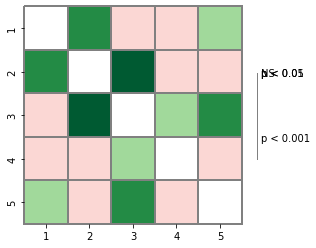

In [30]:
sign_plot(res, **heatmap_args)

In [19]:
from scipy.stats import ttest_ind

mean_patt1 = np.array(mean_patt[0])
mean_patt2 = np.array(mean_patt[1])

res = ttest_ind(mean_patt1,mean_patt2)


pvalue = res[1]

pvalue





0.18806548258076802

In [56]:
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_measures_new/InfDiam_Centro_results/"
#directory = "/home/mariereinbigler/QuPath/projects/Cellpose_measures_new/diam35/ft05/"
directory = "/home/mariereinbigler/QuPath/projects/Cellpose_final_measures_blue45/InfDiam_Centro_results/"

    
    
for pattern in patterns: 
    mean_patt = []
    median_patt=[]
    for i in range(len(files[pattern])):
        means=[]
        medians=[]
        for file in files[pattern][i]:
            raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,13])
            means.append(raw_df['Min diameter µm'].mean())
            medians.append(raw_df['Min diameter µm'].median())
        mean_patt.append(means) 
        median_patt.append(medians)

        
    df = pd.DataFrame(median_patt)
    df = df.transpose()
    #df.columns = ['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type']
    df.columns = ['KO', 'Wild Type']
    print(df)
    #df['Type'] = ['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type']
    ax= sns.boxplot(data=df, color="0.9")
    ax = sns.swarmplot(data=df, color=".1")   
    
    
    ax.set_title("Médiane des diamètres minimum pour un diamètre de 35")
    plt.savefig(f'Mediane_moyenne_{pattern}_diam35_ft05_Seaborn')

ValueError: Length mismatch: Expected axis has 5 elements, new values have 2 elements

20
      Highest dose  Intermediate dose  Lowest dose        KO  Wild Type
0.0       0.000394           0.000255     0.000605  0.000404   0.000502
5.0       0.013575           0.028100     0.029310  0.037957   0.003853
10.0      0.033407           0.077065     0.093619  0.108178   0.009518
15.0      0.039133           0.079672     0.110076  0.117770   0.022890
20.0      0.065373           0.093732     0.104935  0.113562   0.076261
25.0      0.113888           0.107754     0.109747  0.113574   0.155083
30.0      0.151471           0.114776     0.106470  0.107904   0.184525
35.0      0.157842           0.114863     0.100785  0.104482   0.170863
40.0      0.142118           0.109559     0.092430  0.086688   0.145595
45.0      0.114968           0.091233     0.081358  0.073899   0.108000
50.0      0.081837           0.070005     0.065060  0.055556   0.067662
55.0      0.047379           0.050543     0.046173  0.037346   0.031326
60.0      0.024359           0.031610     0.028775  0.022458 

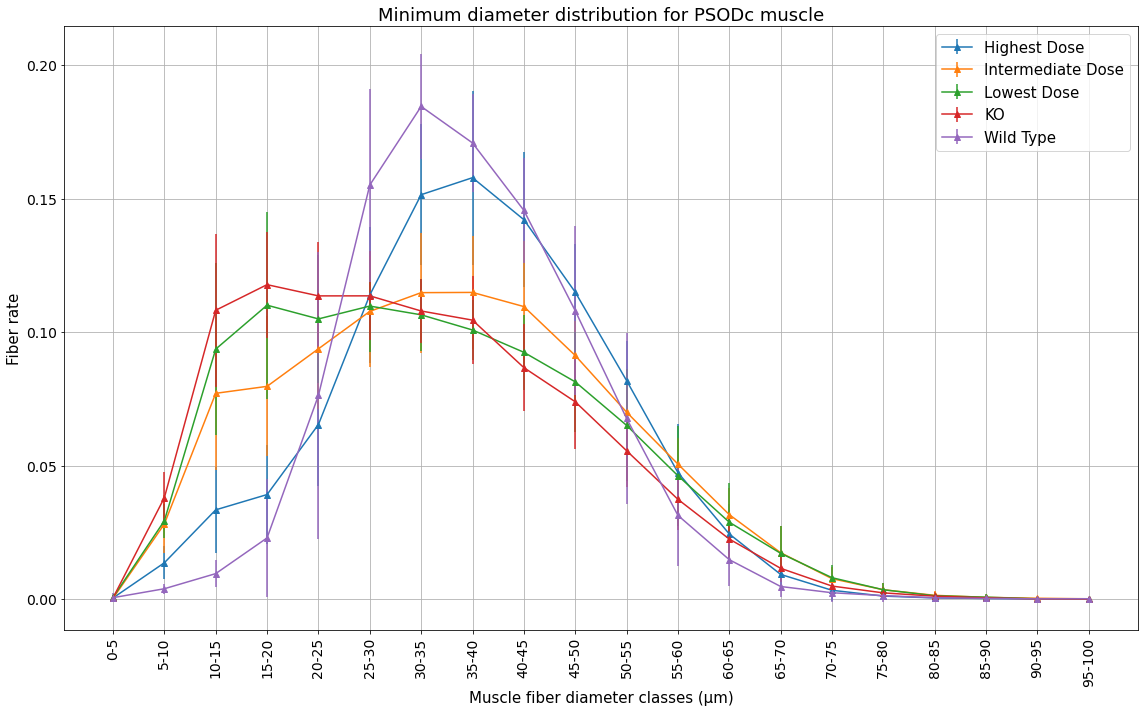

In [16]:
x = np.linspace(0,95,num=20)
y = [[] for i in range(len(files[pattern])) ]
e = [[] for i in range(len(files[pattern]))]
labels=[]
for i in range(0,96,5):
    labels.append(str(i) + "-" +str(i+5)) 
print(len(labels))

for_df = [[] for i in range(5)]

for pattern in patterns:
    fig,ax = plt.subplots(figsize=(16,10))
    ax.set_title(f'Minimum diameter distribution for {pattern} muscle', fontsize=18)
    for j in range(len(files[pattern])):
        data = [[] for i in range(20)]
        y=[]
        e=[]
        for file in files[pattern][j]:
            raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,11])
            histo = np.histogram(raw_df['Min diameter µm'].values.tolist(), bins=np.linspace(0,100,num=21))
            for i in range(20):
                data[i].append(histo[0][i]/sum(histo[0]))
        
        for elt in data:
            y.append(statistics.mean(elt))
            e.append(statistics.stdev(elt))
        
        if (j==0):
            ax.errorbar(x, y, e, marker='^', label="Highest Dose")
            #ax.errorbar(x, y, e, marker='^', label="KO")
        elif (j==1):
            ax.errorbar(x, y, e, marker='^', label="Intermediate Dose")
            #ax.errorbar(x, y, e, marker='^', label="Wild Type")
        elif (j==2):
            ax.errorbar(x, y, e, marker='^', label="Lowest Dose")
        elif (j==3):
            ax.errorbar(x, y, e, marker='^', label="KO")
        else :
            ax.errorbar(x, y, e, marker='^', label="Wild Type")
    
        for_df[j] = y
    
    df = pd.DataFrame(data=np.array(for_df).transpose(), index=x, columns=['Highest dose', 'Intermediate dose', 'Lowest dose', 'KO', 'Wild Type'])
    print(df)
    df.to_csv("Histogram_mean_diam.csv")
    
    
    ax.grid()
    ax.legend(prop={'size': 15})
    
    axes = plt.gca() 
    ax.set_xticks(range(0,96,5))
    axes.xaxis.set_ticklabels(labels, rotation = 90, fontsize = 14)
    ax.set_xlabel("Muscle fiber diameter classes (µm)", fontsize=15)
    ax.set_ylabel("Fiber rate", fontsize=15)
    
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.savefig(f'Histogram_{pattern}_diam35_ft05.')
    plt.show()    
        
    

20


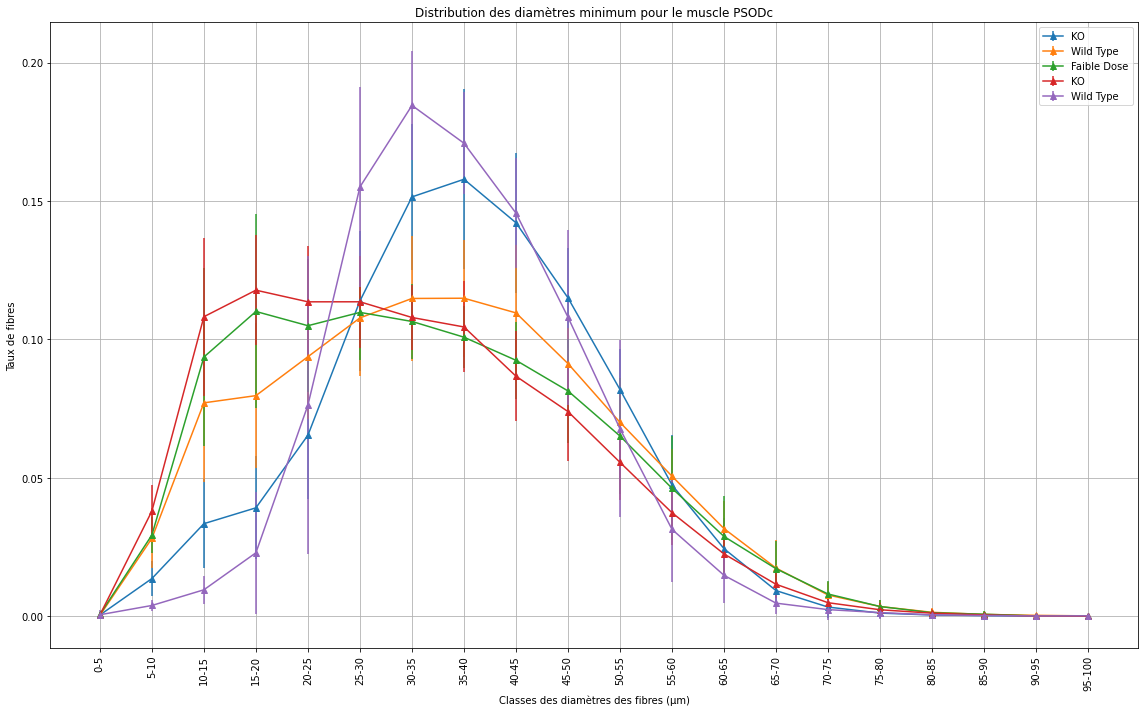

In [28]:
x = np.linspace(0,95,num=20)
y = [[] for i in range(len(files[pattern])) ]
e = [[] for i in range(len(files[pattern]))]
labels=[]
for i in range(0,96,5):
    labels.append(str(i) + "-" +str(i+5)) 
print(len(labels))

for pattern in patterns:
    fig,ax = plt.subplots(figsize=(16,10))
    ax.set_title(f'Distribution des diamètres minimum pour le muscle {pattern}')
    for j in range(len(files[pattern])):
        data = [[] for i in range(20)]
        y=[]
        e=[]
        for file in files[pattern][j]:
            raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,11])
            histo = np.histogram(raw_df['Min diameter µm'].values.tolist(), bins=np.linspace(0,100,num=21))
            for i in range(20):
                data[i].append(histo[0][i]/sum(histo[0]))
        
        for elt in data:
            y.append(statistics.mean(elt))
            e.append(statistics.stdev(elt))
        
        if (j==0):
            #ax.errorbar(x, y, e, marker='^', label="Forte Dose")
            ax.errorbar(x, y, e, marker='^', label="KO")
        elif (j==1):
            #ax.errorbar(x, y, e, marker='^', label="Moyenne Dose")
            ax.errorbar(x, y, e, marker='^', label="Wild Type")
        elif (j==2):
            ax.errorbar(x, y, e, marker='^', label="Faible Dose")
        elif (j==3):
            ax.errorbar(x, y, e, marker='^', label="KO")
        else :
            ax.errorbar(x, y, e, marker='^', label="Wild Type")
    
        
            
    ax.grid()
    ax.legend()
    
    axes = plt.gca() 
    ax.set_xticks(range(0,96,5))
    axes.xaxis.set_ticklabels(labels, rotation = 90)
    ax.set_xlabel("Classes des diamètres des fibres (µm)")
    ax.set_ylabel("Taux de fibres")
    
    plt.tight_layout()
    plt.savefig(f'Histogram_{pattern}_fragmented.pdf', bbox_inches='tight')
    plt.show()    
        
    

In [9]:
directory="/home/mariereinbigler/These/Images/Masks/"

In [42]:
df = pd.read_csv(directory + "times_TRIDc1.txt", delimiter=";", usecols=[0,3], header=None)

In [43]:
df

0            3
0   S29L3-1-Scene-04-TRIDc1.tiff  3075.935502
1     S38L3-Scene-04-TRIDc1.tiff  1831.820705
2     S39L3-Scene-04-TRIDc1.tiff  3382.953518
3     S41L3-Scene-04-TRIDc1.tiff  1697.556299
4     S48L3-Scene-04-TRIDc1.tiff  2111.743603
5   S13L3-1-Scene-04-TRIDc1.tiff  1720.029767
6     S36L3-Scene-04-TRIDc1.tiff  1717.607042
7   S27L3-1-Scene-04-TRIDc1.tiff  2799.128153
8     S34L3-Scene-04-TRIDc1.tiff  2704.439849
9   S15L3-1-Scene-04-TRIDc1.tiff  2582.661143
10   S7L3-1-Scene-04-TRIDc1.tiff  1279.204024
11   S6L3-1-Scene-04-TRIDc1.tiff  3742.233813
12  S21L3-1-Scene-04-TRIDc1.tiff  3144.038221
13  S17L3-1-Scene-04-TRIDc1.tiff  2611.455651
14  S23L3-1-Scene-04-TRIDc1.tiff  2695.657969
15  S22L3-1-Scene-04-TRIDc1.tiff  2936.680052
16    S45L3-Scene-04-TRIDc1.tiff  1201.683790
17    S11L3-Scene-04-TRIDc1.tiff  2058.176558
18    S12L3-Scene-04-TRIDc1.tiff  1486.498116
19     S3L3-Scene-04-TRIDc1.tiff   620.861285
20   S8L3-1-Scene-04-TRIDc1.tiff  2241.849703
21    S40L3-Scene-04-TRIDc1.tiff  3205.438570
22    S35L3-Scene-04-TRIDc1.tiff  2754.030118
23  S19L3-1-Scene-04-TRIDc1.tiff  1790.763081
24     S4L3-Scene-04-TRIDc1.tiff   817.137784
25  S26L3-1-Scene-04-TRIDc1.tiff  3227.126311
26   S5L3-1-Scene-04-TRIDc1.tiff  2557.472175
27    S33L3-Scene-04-TRIDc1.tiff  2247.008341
28    S49L3-Scene-04-TRIDc1.tiff  1883.166840
29     S2L3-Scene-04-TRIDc1.tiff  1850.455908
30  S24L3-1-Scene-04-TRIDc1.tiff   906.957737
31    S42L3-Scene-04-TRIDc1.tiff  1651.798166
32    S43L3-Scene-04-TRIDc1.tiff  2723.028771
33    S37L3-Scene-01-TRIDc1.tiff  1486.961972
34  S10L3-1-Scene-04-TRIDc1.tiff  2221.884301
35  S14L3-1-Scene-04-TRIDc1.tiff  1219.641154
36   S9L3-1-Scene-04-TRIDc1.tiff  1616.125499
37  S16L3-1-Scene-04-TRIDc1.tiff  3792.338591
38    S47L3-Scene-04-TRIDc1.tiff  1924.925572
39  S18L3-1-Scene-04-TRIDc1.tiff  3061.056952
40  S30L3-1-Scene-04-TRIDc1.tiff  2408.534035
41  S32L3-1-Scene-04-TRIDc1.tiff  3648.941921
42    S46L3-Scene-04-TRIDc1.tiff  3041.931916
43    S44L3-Scene-04-TRIDc1.tiff  3474.726681
44  S28L3-1-Scene-04-TRIDc1.tiff  1764.851369
45    S50L3-Scene-04-TRIDc1.tiff  2287.738730
46  S25L3-1-Scene-04-TRIDc1.tiff  2602.428112
47     S1L3-Scene-04-TRIDc1.tiff  2078.427962
48  S20L3-1-Scene-04-TRIDc1.tiff  2951.942869
49  S31L3-1-Scene-04-TRIDc1.tiff  1691.203266
50                        114997          NaN

In [44]:
lim_df = df[3][:-1]

In [45]:
print(lim_df.values.mean())

2290.6051893806457


In [124]:
raw_df = pd.read_csv("/home/mariereinbigler/Téléchargements/wetransfer_data-zip_2022-01-07_2150/outputs/Diam50_seuil051.csv", delimiter=";")

In [125]:
raw_df

ImageName  Precision    Rappel        F1
0   S33L1-Scene-04-LADc1 cor v1 50   0.973715  0.900351  0.935597
1   S34L1-Scene-04-LADc1 cor v1 50   0.943964  0.969391  0.956509
2   S35L1-Scene-04-LADc1 cor v1 50   0.930091  0.923077  0.926571
3   S36L1-Scene-04-LADc1 cor v1 50   0.915392  0.920082  0.917731
4   S37L1-Scene-01-LADc1 cor v1 50   0.976032  0.840169  0.903019
5   S38L1-Scene-04-LADc1 cor v1 50   0.956943  0.937692  0.947220
6   S39L1-Scene-04-LADc1 cor v1 50   0.969801  0.931693  0.950365
7   S40L1-Scene-04-LADc1 cor v1 50   0.902768  0.897489  0.900121
8   S42L1-Scene-04-LADc1 cor v1 50   0.964876  0.992410  0.978450
9   S43L1-Scene-04-LADc1 cor v1 50   0.992188  0.982830  0.987486
10  S44L1-Scene-04-LADc1 cor v1 50   0.988470  0.959634  0.973838
11  S45L1-Scene-04-LADc1 cor v1 50   0.977370  0.987029  0.982176
12  S46L1-Scene-04-LADc1 cor v1 50   0.987931  0.977260  0.982566
13  S49L1-Scene-04-LADc1 cor v1 50   0.967733  0.979347  0.973505
14  S50L1-Scene-04-LADc1 cor v1 50   0.934471  0.949941  0.942142

In [126]:
precision = { "KO" : raw_df["Precision"].iloc[:7].tolist(), "WildType" : raw_df["Precision"].iloc[7:].tolist()  }
rappel = { "KO" : raw_df["Rappel"].iloc[:7].tolist(), "WildType" : raw_df["Rappel"].iloc[7:].tolist()  }
F1 = { "KO" : raw_df["F1"].iloc[:7].tolist(), "WildType" : raw_df["F1"].iloc[7:].tolist()  }

In [127]:
precision['KO'].append(np.NaN)
rappel['KO'].append(np.NaN)
F1['KO'].append(np.NaN)

In [128]:
df_prec = pd.DataFrame(data = precision)
df_rap = pd.DataFrame(data = rappel)
df_F1 = pd.DataFrame(data = F1)

In [129]:
df_F1

KO  WildType
0  0.935597  0.900121
1  0.956509  0.978450
2  0.926571  0.987486
3  0.917731  0.973838
4  0.903019  0.982176
5  0.947220  0.982566
6  0.950365  0.973505
7       NaN  0.942142

[(0.75, 1.0)]

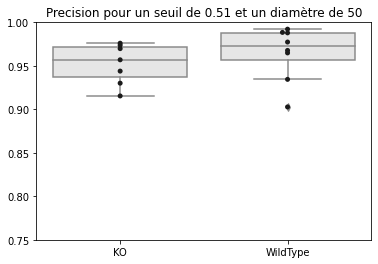

In [130]:
ax= sns.boxplot(data=df_prec, color="0.9")
ax = sns.swarmplot(data=df_prec, color=".1") 
ax.set_title('Precision pour un seuil de 0.51 et un diamètre de 50')
ax.set(ylim=(0.75, 1))

[(0.75, 1.0)]

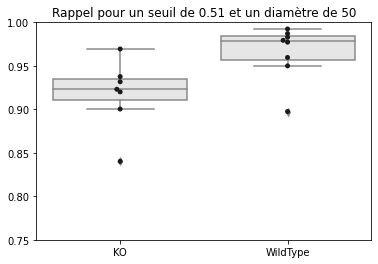

In [131]:
ax= sns.boxplot(data=df_rap, color="0.9")
ax = sns.swarmplot(data=df_rap, color=".1") 
ax.set_title('Rappel pour un seuil de 0.51 et un diamètre de 50')
ax.set(ylim=(0.75, 1))

[(0.75, 1.0)]

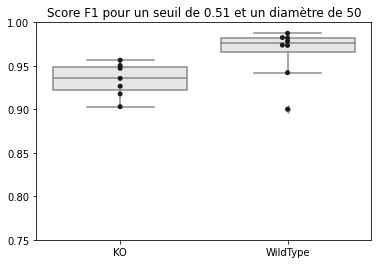

In [132]:
ax= sns.boxplot(data=df_F1, color="0.9")
ax = sns.swarmplot(data=df_F1, color=".1") 
ax.set_title('Score F1 pour un seuil de 0.51 et un diamètre de 50')
ax.set(ylim=(0.75, 1))

In [86]:
means = []

platforms = [ "Nuc",  "3a401-12", "sandor"]

for platform in platforms:
    mean=[]
    for i in range(1,6):
        times_df = pd.read_csv("/home/mariereinbigler/These/CellposeArticle/TimeBenchmark/" + platform + "/times_PSOD_" + str(i) + ".txt", delimiter=";", usecols=[0,1,2,3], names=['Image', 'Segm time', 'PNG generation', 'Total time'])
        mean.append(times_df['Total time'].mean())
    means.append(mean)

In [87]:
means

[[1246.982073378563,
  1247.3503944349288,
  1261.0307889938354,
  1260.4342282390594,
  1259.790929107666],
 [1180.8463568115235,
  1187.3099070930482,
  1197.0550004577638,
  1193.1923354387284,
  1196.0116151428222],
 [344.0514706689484,
  345.4877654435683,
  345.572185058983,
  344.12749389726287,
  346.45534281341395]]

           Nuc     3a401-12      sandor
0  1246.982073  1180.846357  344.051471
1  1247.350394  1187.309907  345.487765
2  1261.030789  1197.055000  345.572185
3  1260.434228  1193.192335  344.127494
4  1259.790929  1196.011615  346.455343


Text(0.30000000000000426, 0.5, 'Time (min)')

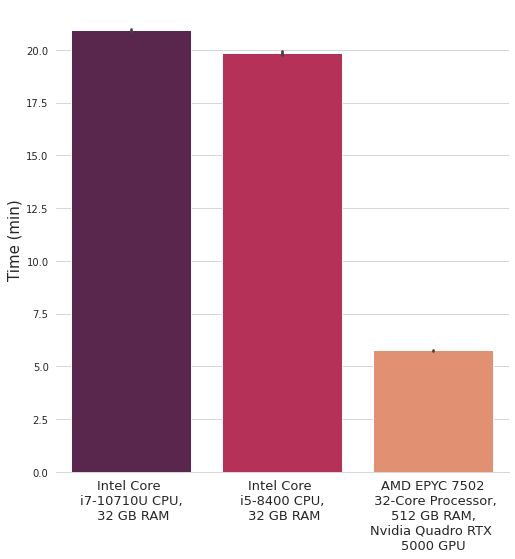

In [88]:
tips = pd.DataFrame(means).transpose()
tips.columns = platforms

print(tips)
tips = tips/60

sns.set_style("whitegrid")

g = sns.catplot(
    data=tips, kind="bar",
    palette="rocket", alpha=1, height=7
)
g.despine(left=True)
g.set_xticklabels(['Intel Core \ni7-10710U CPU,\n 32 GB RAM', 'Intel Core \ni5-8400 CPU,\n 32 GB RAM', 'AMD EPYC 7502\n 32-Core Processor,\n 512 GB RAM, \nNvidia Quadro RTX \n5000 GPU']
, size=13)
#plt.title("Total execution time including segmentation \n and PNG export", fontsize=15)

plt.ylabel("Time (min)", fontsize=15)

In [32]:
times_df = pd.read_csv("/home/mariereinbigler/These/CellposeArticle/TimeBenchmark/3a401-12/times_PSOD_2.txt", delimiter=";", usecols=[0,1,2,3], names=['Image', 'Segm time', 'PNG generation', 'Total time'])

In [149]:
sizes_df = pd.read_csv("/home/mariereinbigler/Téléchargements/converted/sizes.txt", delimiter=" ", usecols=[0,1], names=['Size', 'Image'] )

In [150]:
sizes_df

Size                            Image
0   115072  S19L2-1-Scene-11-PSODc2.ome.tif
1   115148  S10L2-1-Scene-12-PSODc3.ome.tif
2   115208    S47L2-Scene-10-PSODc1.ome.tif
3   115296  S21L2-1-Scene-12-PSODc3.ome.tif
4   119556  S23L2-1-Scene-11-PSODc2.ome.tif
5   119804     S3L2-Scene-11-PSODc2.ome.tif
6   133808    S43L2-Scene-10-PSODc1.ome.tif
7   142804    S40L2-Scene-11-PSODc2.ome.tif
8   142852    S42L2-Scene-12-PSODc3.ome.tif
9   142868  S26L2-1-Scene-10-PSODc1.ome.tif
10  142872    S33L2-Scene-10-PSODc1.ome.tif
11  142872   S9L2-1-Scene-11-PSODc2.ome.tif
12  142876    S45L2-Scene-12-PSODc3.ome.tif
13  142904  S24L2-1-Scene-11-PSODc2.ome.tif
14  142920  S18L2-1-Scene-12-PSODc3.ome.tif
15  143020    S48L2-Scene-10-PSODc1.ome.tif
16  143044   S8L2-1-Scene-12-PSODc3.ome.tif
17  143080  S27L2-1-Scene-10-PSODc1.ome.tif
18  143128    S46L2-Scene-11-PSODc2.ome.tif
19  165852  S30L2-1-Scene-10-PSODc1.ome.tif
20  166184    S49L2-Scene-12-PSODc3.ome.tif
21  166224  S22L2-1-Scene-11-PSODc2.ome.tif
22  166416   S7L2-1-Scene-12-PSODc3.ome.tif
23  166448    S39L2-Scene-11-PSODc2.ome.tif
24  166476  S15L2-1-Scene-11-PSODc2.ome.tif
25  166492    S35L2-Scene-12-PSODc3.ome.tif
26  166528  S20L2-1-Scene-12-PSODc3.ome.tif
27  166568    S50L2-Scene-12-PSODc3.ome.tif
28  166588   S5L2-1-Scene-11-PSODc2.ome.tif
29  166632    S11L2-Scene-11-PSODc2.ome.tif
30  170616    S38L2-Scene-12-PSODc3.ome.tif
31  170916  S14L2-1-Scene-10-PSODc1.ome.tif
32  170916    S34L2-Scene-10-PSODc1.ome.tif
33  170996  S17L2-1-Scene-12-PSODc3.ome.tif
34  171024  S32L2-1-Scene-11-PSODc2.ome.tif
35  189588    S44L2-Scene-12-PSODc3.ome.tif
36  198604  S31L2-1-Scene-10-PSODc1.ome.tif
37  198688  S16L2-1-Scene-12-PSODc3.ome.tif
38  198724  S28L2-1-Scene-11-PSODc2.ome.tif
39  199048  S13L2-1-Scene-12-PSODc3.ome.tif
40  231140     S37L2-Scene-5-PSODc2.ome.tif
41  231236    S36L2-Scene-11-PSODc2.ome.tif
42  254344  S29L2-1-Scene-11-PSODc2.ome.tif
43  254692   S6L2-1-Scene-11-PSODc2.ome.tif
44  263460  S25L2-1-Scene-12-PSODc3.ome.tif
45  337876    S12L2-Scene-12-PSODc3.ome.tif
46   96276    S41L2-Scene-11-PSODc2.ome.tif
47   96292     S4L2-Scene-11-PSODc2.ome.tif
48   96300     S2L2-Scene-10-PSODc1.ome.tif
49   96324     S1L2-Scene-11-PSODc2.ome.tif

In [151]:
sizes_df.sort_values(by=['Size'], ascending=False)

Size                            Image
45  337876    S12L2-Scene-12-PSODc3.ome.tif
44  263460  S25L2-1-Scene-12-PSODc3.ome.tif
43  254692   S6L2-1-Scene-11-PSODc2.ome.tif
42  254344  S29L2-1-Scene-11-PSODc2.ome.tif
41  231236    S36L2-Scene-11-PSODc2.ome.tif
40  231140     S37L2-Scene-5-PSODc2.ome.tif
39  199048  S13L2-1-Scene-12-PSODc3.ome.tif
38  198724  S28L2-1-Scene-11-PSODc2.ome.tif
37  198688  S16L2-1-Scene-12-PSODc3.ome.tif
36  198604  S31L2-1-Scene-10-PSODc1.ome.tif
35  189588    S44L2-Scene-12-PSODc3.ome.tif
34  171024  S32L2-1-Scene-11-PSODc2.ome.tif
33  170996  S17L2-1-Scene-12-PSODc3.ome.tif
32  170916    S34L2-Scene-10-PSODc1.ome.tif
31  170916  S14L2-1-Scene-10-PSODc1.ome.tif
30  170616    S38L2-Scene-12-PSODc3.ome.tif
29  166632    S11L2-Scene-11-PSODc2.ome.tif
28  166588   S5L2-1-Scene-11-PSODc2.ome.tif
27  166568    S50L2-Scene-12-PSODc3.ome.tif
26  166528  S20L2-1-Scene-12-PSODc3.ome.tif
25  166492    S35L2-Scene-12-PSODc3.ome.tif
24  166476  S15L2-1-Scene-11-PSODc2.ome.tif
23  166448    S39L2-Scene-11-PSODc2.ome.tif
22  166416   S7L2-1-Scene-12-PSODc3.ome.tif
21  166224  S22L2-1-Scene-11-PSODc2.ome.tif
20  166184    S49L2-Scene-12-PSODc3.ome.tif
19  165852  S30L2-1-Scene-10-PSODc1.ome.tif
18  143128    S46L2-Scene-11-PSODc2.ome.tif
17  143080  S27L2-1-Scene-10-PSODc1.ome.tif
16  143044   S8L2-1-Scene-12-PSODc3.ome.tif
15  143020    S48L2-Scene-10-PSODc1.ome.tif
14  142920  S18L2-1-Scene-12-PSODc3.ome.tif
13  142904  S24L2-1-Scene-11-PSODc2.ome.tif
12  142876    S45L2-Scene-12-PSODc3.ome.tif
10  142872    S33L2-Scene-10-PSODc1.ome.tif
11  142872   S9L2-1-Scene-11-PSODc2.ome.tif
9   142868  S26L2-1-Scene-10-PSODc1.ome.tif
8   142852    S42L2-Scene-12-PSODc3.ome.tif
7   142804    S40L2-Scene-11-PSODc2.ome.tif
6   133808    S43L2-Scene-10-PSODc1.ome.tif
5   119804     S3L2-Scene-11-PSODc2.ome.tif
4   119556  S23L2-1-Scene-11-PSODc2.ome.tif
3   115296  S21L2-1-Scene-12-PSODc3.ome.tif
2   115208    S47L2-Scene-10-PSODc1.ome.tif
1   115148  S10L2-1-Scene-12-PSODc3.ome.tif
0   115072  S19L2-1-Scene-11-PSODc2.ome.tif
49   96324     S1L2-Scene-11-PSODc2.ome.tif
48   96300     S2L2-Scene-10-PSODc1.ome.tif
47   96292     S4L2-Scene-11-PSODc2.ome.tif
46   96276    S41L2-Scene-11-PSODc2.ome.tif

In [152]:
times_df

Image    Segm time  PNG generation   Total time
0   S10L2-1-Scene-12-PSODc3.ome.tif   554.957551       79.341002   634.298553
1     S48L2-Scene-10-PSODc1.ome.tif   831.111570      189.471574  1020.583144
2     S49L2-Scene-12-PSODc3.ome.tif   974.269240      252.027441  1226.296681
3   S26L2-1-Scene-10-PSODc1.ome.tif   820.212080      243.547431  1063.759512
4     S45L2-Scene-12-PSODc3.ome.tif   720.562479      124.300894   844.863374
5     S35L2-Scene-12-PSODc3.ome.tif   965.337007      306.584425  1271.921432
6   S16L2-1-Scene-12-PSODc3.ome.tif  1054.182536      305.509167  1359.691703
7   S29L2-1-Scene-11-PSODc2.ome.tif  1369.519494      690.439744  2059.959239
8     S46L2-Scene-11-PSODc2.ome.tif   728.059048      138.732157   866.791205
9     S34L2-Scene-10-PSODc1.ome.tif   854.248824      269.444842  1123.693666
10    S12L2-Scene-12-PSODc3.ome.tif  2016.680347     1009.045990  3025.726337
11    S41L2-Scene-11-PSODc2.ome.tif   537.296585       66.133091   603.429677
12   S5L2-1-Scene-11-PSODc2.ome.tif   934.280502      331.245616  1265.526118
13   S6L2-1-Scene-11-PSODc2.ome.tif  1337.993855      418.247765  1756.241620
14  S17L2-1-Scene-12-PSODc3.ome.tif   973.624121      304.933985  1278.558106
15   S7L2-1-Scene-12-PSODc3.ome.tif   880.434825      143.558722  1023.993546
16    S43L2-Scene-10-PSODc1.ome.tif   754.827205      190.031386   944.858591
17  S15L2-1-Scene-11-PSODc2.ome.tif   848.107368      284.351462  1132.458831
18    S38L2-Scene-12-PSODc3.ome.tif   959.428050      407.986655  1367.414706
19     S2L2-Scene-10-PSODc1.ome.tif   605.174361       80.155774   685.330134
20  S23L2-1-Scene-11-PSODc2.ome.tif   702.947970      182.616216   885.564186
21    S11L2-Scene-11-PSODc2.ome.tif   979.622642      249.382045  1229.004687
22  S19L2-1-Scene-11-PSODc2.ome.tif   703.898490      157.734962   861.633452
23  S24L2-1-Scene-11-PSODc2.ome.tif   758.543588      153.502667   912.046255
24    S42L2-Scene-12-PSODc3.ome.tif   762.484879      175.064523   937.549403
25    S33L2-Scene-10-PSODc1.ome.tif   729.622276      210.194374   939.816649
26  S21L2-1-Scene-12-PSODc3.ome.tif   695.288670      244.510933   939.799604
27  S31L2-1-Scene-10-PSODc1.ome.tif  1017.963810      276.797700  1294.761510
28     S37L2-Scene-5-PSODc2.ome.tif  1269.622960      414.315328  1683.938287
29  S13L2-1-Scene-12-PSODc3.ome.tif  1098.124752      356.859414  1454.984166
30  S22L2-1-Scene-11-PSODc2.ome.tif   864.460176      489.353400  1353.813576
31    S47L2-Scene-10-PSODc1.ome.tif   639.481906      176.711686   816.193592
32  S32L2-1-Scene-11-PSODc2.ome.tif   979.621700      290.813949  1270.435648
33  S27L2-1-Scene-10-PSODc1.ome.tif   825.984865      250.590125  1076.574990
34    S36L2-Scene-11-PSODc2.ome.tif  1405.701880      597.542835  2003.244715
35     S3L2-Scene-11-PSODc2.ome.tif   720.164995      104.925775   825.090770
36  S30L2-1-Scene-10-PSODc1.ome.tif   872.423233      211.726224  1084.149457
37    S44L2-Scene-12-PSODc3.ome.tif   951.810731      191.038373  1142.849104
38    S50L2-Scene-12-PSODc3.ome.tif   881.548536      258.863117  1140.411653
39    S40L2-Scene-11-PSODc2.ome.tif   824.964426      218.367222  1043.331648
40  S14L2-1-Scene-10-PSODc1.ome.tif  1019.701626      303.604879  1323.306504
41     S4L2-Scene-11-PSODc2.ome.tif   574.445427       62.311972   636.757400
42  S20L2-1-Scene-12-PSODc3.ome.tif   945.373700      291.947371  1237.321070
43    S39L2-Scene-11-PSODc2.ome.tif   964.275343      302.431134  1266.706477
44   S9L2-1-Scene-11-PSODc2.ome.tif   757.743361      630.464516  1388.207877
45  S28L2-1-Scene-11-PSODc2.ome.tif  1045.345628      344.193990  1389.539618
46  S18L2-1-Scene-12-PSODc3.ome.tif   864.902336      199.169307  1064.071643
47   S8L2-1-Scene-12-PSODc3.ome.tif   829.830333      179.075340  1008.905673
48  S25L2-1-Scene-12-PSODc3.ome.tif  1496.715423      497.539722  1994.255146
49     S1L2-Scene-11-PSODc2.ome.tif   547.873771       57.960652   605.834423

In [153]:
times_df.sort_values(by=['Total time'], ascending=False)

Image    Segm time  PNG generation   Total time
10    S12L2-Scene-12-PSODc3.ome.tif  2016.680347     1009.045990  3025.726337
7   S29L2-1-Scene-11-PSODc2.ome.tif  1369.519494      690.439744  2059.959239
34    S36L2-Scene-11-PSODc2.ome.tif  1405.701880      597.542835  2003.244715
48  S25L2-1-Scene-12-PSODc3.ome.tif  1496.715423      497.539722  1994.255146
13   S6L2-1-Scene-11-PSODc2.ome.tif  1337.993855      418.247765  1756.241620
28     S37L2-Scene-5-PSODc2.ome.tif  1269.622960      414.315328  1683.938287
29  S13L2-1-Scene-12-PSODc3.ome.tif  1098.124752      356.859414  1454.984166
45  S28L2-1-Scene-11-PSODc2.ome.tif  1045.345628      344.193990  1389.539618
44   S9L2-1-Scene-11-PSODc2.ome.tif   757.743361      630.464516  1388.207877
18    S38L2-Scene-12-PSODc3.ome.tif   959.428050      407.986655  1367.414706
6   S16L2-1-Scene-12-PSODc3.ome.tif  1054.182536      305.509167  1359.691703
30  S22L2-1-Scene-11-PSODc2.ome.tif   864.460176      489.353400  1353.813576
40  S14L2-1-Scene-10-PSODc1.ome.tif  1019.701626      303.604879  1323.306504
27  S31L2-1-Scene-10-PSODc1.ome.tif  1017.963810      276.797700  1294.761510
14  S17L2-1-Scene-12-PSODc3.ome.tif   973.624121      304.933985  1278.558106
5     S35L2-Scene-12-PSODc3.ome.tif   965.337007      306.584425  1271.921432
32  S32L2-1-Scene-11-PSODc2.ome.tif   979.621700      290.813949  1270.435648
43    S39L2-Scene-11-PSODc2.ome.tif   964.275343      302.431134  1266.706477
12   S5L2-1-Scene-11-PSODc2.ome.tif   934.280502      331.245616  1265.526118
42  S20L2-1-Scene-12-PSODc3.ome.tif   945.373700      291.947371  1237.321070
21    S11L2-Scene-11-PSODc2.ome.tif   979.622642      249.382045  1229.004687
2     S49L2-Scene-12-PSODc3.ome.tif   974.269240      252.027441  1226.296681
37    S44L2-Scene-12-PSODc3.ome.tif   951.810731      191.038373  1142.849104
38    S50L2-Scene-12-PSODc3.ome.tif   881.548536      258.863117  1140.411653
17  S15L2-1-Scene-11-PSODc2.ome.tif   848.107368      284.351462  1132.458831
9     S34L2-Scene-10-PSODc1.ome.tif   854.248824      269.444842  1123.693666
36  S30L2-1-Scene-10-PSODc1.ome.tif   872.423233      211.726224  1084.149457
33  S27L2-1-Scene-10-PSODc1.ome.tif   825.984865      250.590125  1076.574990
46  S18L2-1-Scene-12-PSODc3.ome.tif   864.902336      199.169307  1064.071643
3   S26L2-1-Scene-10-PSODc1.ome.tif   820.212080      243.547431  1063.759512
39    S40L2-Scene-11-PSODc2.ome.tif   824.964426      218.367222  1043.331648
15   S7L2-1-Scene-12-PSODc3.ome.tif   880.434825      143.558722  1023.993546
1     S48L2-Scene-10-PSODc1.ome.tif   831.111570      189.471574  1020.583144
47   S8L2-1-Scene-12-PSODc3.ome.tif   829.830333      179.075340  1008.905673
16    S43L2-Scene-10-PSODc1.ome.tif   754.827205      190.031386   944.858591
25    S33L2-Scene-10-PSODc1.ome.tif   729.622276      210.194374   939.816649
26  S21L2-1-Scene-12-PSODc3.ome.tif   695.288670      244.510933   939.799604
24    S42L2-Scene-12-PSODc3.ome.tif   762.484879      175.064523   937.549403
23  S24L2-1-Scene-11-PSODc2.ome.tif   758.543588      153.502667   912.046255
20  S23L2-1-Scene-11-PSODc2.ome.tif   702.947970      182.616216   885.564186
8     S46L2-Scene-11-PSODc2.ome.tif   728.059048      138.732157   866.791205
22  S19L2-1-Scene-11-PSODc2.ome.tif   703.898490      157.734962   861.633452
4     S45L2-Scene-12-PSODc3.ome.tif   720.562479      124.300894   844.863374
35     S3L2-Scene-11-PSODc2.ome.tif   720.164995      104.925775   825.090770
31    S47L2-Scene-10-PSODc1.ome.tif   639.481906      176.711686   816.193592
19     S2L2-Scene-10-PSODc1.ome.tif   605.174361       80.155774   685.330134
41     S4L2-Scene-11-PSODc2.ome.tif   574.445427       62.311972   636.757400
0   S10L2-1-Scene-12-PSODc3.ome.tif   554.957551       79.341002   634.298553
49     S1L2-Scene-11-PSODc2.ome.tif   547.873771       57.960652   605.834423
11    S41L2-Scene-11-PSODc2.ome.tif   537.296585       66.133091   603.429677

In [154]:
merged_inner = pd.merge(left=times_df, right=sizes_df, left_on='Image', right_on='Image')

In [155]:
merged_inner.sort_values(by="Size")

Image    Segm time  PNG generation   Total time  \
11    S41L2-Scene-11-PSODc2.ome.tif   537.296585       66.133091   603.429677   
41     S4L2-Scene-11-PSODc2.ome.tif   574.445427       62.311972   636.757400   
19     S2L2-Scene-10-PSODc1.ome.tif   605.174361       80.155774   685.330134   
49     S1L2-Scene-11-PSODc2.ome.tif   547.873771       57.960652   605.834423   
22  S19L2-1-Scene-11-PSODc2.ome.tif   703.898490      157.734962   861.633452   
0   S10L2-1-Scene-12-PSODc3.ome.tif   554.957551       79.341002   634.298553   
31    S47L2-Scene-10-PSODc1.ome.tif   639.481906      176.711686   816.193592   
26  S21L2-1-Scene-12-PSODc3.ome.tif   695.288670      244.510933   939.799604   
20  S23L2-1-Scene-11-PSODc2.ome.tif   702.947970      182.616216   885.564186   
35     S3L2-Scene-11-PSODc2.ome.tif   720.164995      104.925775   825.090770   
16    S43L2-Scene-10-PSODc1.ome.tif   754.827205      190.031386   944.858591   
39    S40L2-Scene-11-PSODc2.ome.tif   824.964426      218.367222  1043.331648   
24    S42L2-Scene-12-PSODc3.ome.tif   762.484879      175.064523   937.549403   
3   S26L2-1-Scene-10-PSODc1.ome.tif   820.212080      243.547431  1063.759512   
44   S9L2-1-Scene-11-PSODc2.ome.tif   757.743361      630.464516  1388.207877   
25    S33L2-Scene-10-PSODc1.ome.tif   729.622276      210.194374   939.816649   
4     S45L2-Scene-12-PSODc3.ome.tif   720.562479      124.300894   844.863374   
23  S24L2-1-Scene-11-PSODc2.ome.tif   758.543588      153.502667   912.046255   
46  S18L2-1-Scene-12-PSODc3.ome.tif   864.902336      199.169307  1064.071643   
1     S48L2-Scene-10-PSODc1.ome.tif   831.111570      189.471574  1020.583144   
47   S8L2-1-Scene-12-PSODc3.ome.tif   829.830333      179.075340  1008.905673   
33  S27L2-1-Scene-10-PSODc1.ome.tif   825.984865      250.590125  1076.574990   
8     S46L2-Scene-11-PSODc2.ome.tif   728.059048      138.732157   866.791205   
36  S30L2-1-Scene-10-PSODc1.ome.tif   872.423233      211.726224  1084.149457   
2     S49L2-Scene-12-PSODc3.ome.tif   974.269240      252.027441  1226.296681   
30  S22L2-1-Scene-11-PSODc2.ome.tif   864.460176      489.353400  1353.813576   
15   S7L2-1-Scene-12-PSODc3.ome.tif   880.434825      143.558722  1023.993546   
43    S39L2-Scene-11-PSODc2.ome.tif   964.275343      302.431134  1266.706477   
17  S15L2-1-Scene-11-PSODc2.ome.tif   848.107368      284.351462  1132.458831   
5     S35L2-Scene-12-PSODc3.ome.tif   965.337007      306.584425  1271.921432   
42  S20L2-1-Scene-12-PSODc3.ome.tif   945.373700      291.947371  1237.321070   
38    S50L2-Scene-12-PSODc3.ome.tif   881.548536      258.863117  1140.411653   
12   S5L2-1-Scene-11-PSODc2.ome.tif   934.280502      331.245616  1265.526118   
21    S11L2-Scene-11-PSODc2.ome.tif   979.622642      249.382045  1229.004687   
18    S38L2-Scene-12-PSODc3.ome.tif   959.428050      407.986655  1367.414706   
40  S14L2-1-Scene-10-PSODc1.ome.tif  1019.701626      303.604879  1323.306504   
9     S34L2-Scene-10-PSODc1.ome.tif   854.248824      269.444842  1123.693666   
14  S17L2-1-Scene-12-PSODc3.ome.tif   973.624121      304.933985  1278.558106   
32  S32L2-1-Scene-11-PSODc2.ome.tif   979.621700      290.813949  1270.435648   
37    S44L2-Scene-12-PSODc3.ome.tif   951.810731      191.038373  1142.849104   
27  S31L2-1-Scene-10-PSODc1.ome.tif  1017.963810      276.797700  1294.761510   
6   S16L2-1-Scene-12-PSODc3.ome.tif  1054.182536      305.509167  1359.691703   
45  S28L2-1-Scene-11-PSODc2.ome.tif  1045.345628      344.193990  1389.539618   
29  S13L2-1-Scene-12-PSODc3.ome.tif  1098.124752      356.859414  1454.984166   
28     S37L2-Scene-5-PSODc2.ome.tif  1269.622960      414.315328  1683.938287   
34    S36L2-Scene-11-PSODc2.ome.tif  1405.701880      597.542835  2003.244715   
7   S29L2-1-Scene-11-PSODc2.ome.tif  1369.519494      690.439744  2059.959239   
13   S6L2-1-Scene-11-PSODc2.ome.tif  1337.993855      418.247765  1756.241620   
48  S25L2-1-Scene-12-PSODc3.ome.tif  1496.715423      497.539

In [156]:
merged_inner['Segm time'].iloc[0] /merged_inner['Segm time'].iloc[49]

1.0129295837551497

In [157]:
merged_inner['Size'].iloc[0] /merged_inner['Size'].iloc[49]

1.1954237780823056

<AxesSubplot:xlabel='Size', ylabel='Segm time'>

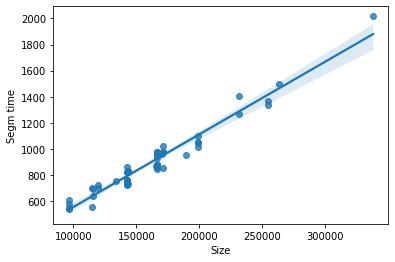

In [158]:
sns.regplot(x='Size',y='Segm time', data=merged_inner, fit_reg=True)

In [159]:
from sklearn.linear_model import LinearRegression

X = merged_inner['Size'].values.reshape(-1, 1)
Y = merged_inner['Segm time'].values.reshape(-1, 1)
linear_regressor = LinearRegression(fit_intercept = False)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
print(linear_regressor.score(X, Y))
print(linear_regressor.coef_)
print(linear_regressor.intercept_)
Y_pred = linear_regressor.predict(X)  # make predictions

0.9547904935872632
[[0.00555939]]
0.0


In [160]:
from sklearn.linear_model import LinearRegression

X = merged_inner['Size'].values.reshape(-1, 1)
Y = merged_inner['Total time'].values.reshape(-1, 1)
linear_regressor = LinearRegression(fit_intercept = False)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
print(linear_regressor.score(X, Y))
print(linear_regressor.coef_)
print(linear_regressor.intercept_)
Y_pred = linear_regressor.predict(X)  # make predictions

0.8894715740010122
[[0.00736879]]
0.0


In [165]:
from sklearn.linear_model import LinearRegression

X = merged_inner['Size'].values.reshape(-1, 1)
Y = merged_inner['PNG generation'].values.reshape(-1, 1)
linear_regressor = LinearRegression(fit_intercept = True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
print(linear_regressor.score(X, Y))
print(linear_regressor.coef_)
print(linear_regressor.intercept_)
Y_pred = linear_regressor.predict(X)  # make predictions

0.7017114894470424
[[0.00312552]]
[-232.82798258]


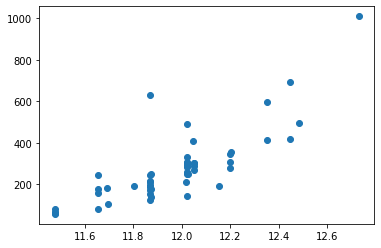

In [169]:
plt.scatter(X, Y)
#plt.plot(X, Y_pred, color='red')
plt.show()

In [178]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 10)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, Y)
lin2 = LinearRegression()
lin2.fit(X_poly, Y)

LinearRegression()

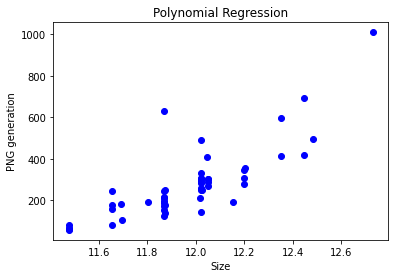

In [185]:
plt.scatter(X, Y, color = 'blue')
 
#plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Size')
plt.ylabel('PNG generation')
 
plt.show()

In [131]:
from sklearn.metrics import r2_score
R_square = r2_score(X, Y) 
print('Coefficient of Determination', R_square) 

np.corrcoef(merged_inner['Size'],merged_inner['Segm time'])


Coefficient of Determination -12.08206289577589


array([[1.      , 0.977402],
       [0.977402, 1.      ]])

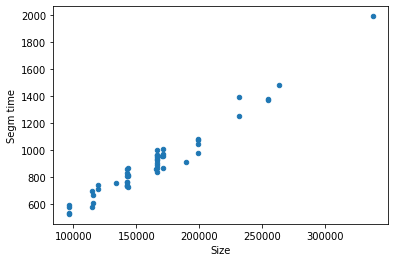

In [113]:
merged_inner.plot.scatter(x="Size", y="Segm time", );

   Inter i7  Intel i5  server
0        11        11      13
1        10        15      18
2         9        13      17


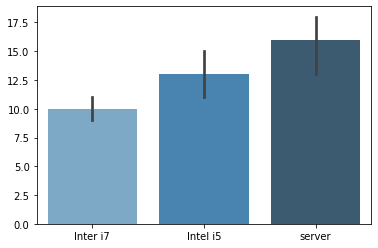

In [25]:

dico = {"power": ["Inter i7", "Intel i5", "server"], "time": [[11,11,13], [10,15,18],[9,13,17]]}

tips = pd.DataFrame(dico["time"], columns=dico["power"])

print(tips)

ax = sns.barplot(data=tips, palette="Blues_d")

In [4]:
directory = "/home/mariereinbigler/QuPath/projects/Basic_measurements/InfDiam_Centro_results/"

tot_df = []
for i in range(5):
     for file in files[pattern][i]:
            print(file)
            raw_df = pd.read_csv(directory + file, delimiter="\t")
            tot_df.append(raw_df)

S1L2-Scene-11-PSODc2.czi Annotations.txt
S9L2-1-Scene-11-PSODc2.czi Annotations.txt
S7L2-1-Scene-12-PSODc3.czi Annotations.txt
S2L2-Scene-10-PSODc1.czi Annotations.txt
S3L2-Scene-11-PSODc2.czi Annotations.txt
S4L2-Scene-11-PSODc2.czi Annotations.txt
S8L2-1-Scene-12-PSODc3.czi Annotations.txt
S5L2-1-Scene-11-PSODc2.czi Annotations.txt
S6L2-1-Scene-11-PSODc2.czi Annotations.txt
S10L2-1-Scene-12-PSODc3.czi Annotations.txt
S14L2-1-Scene-10-PSODc1.czi Annotations.txt
S17L2-1-Scene-12-PSODc3.czi Annotations.txt
S13L2-1-Scene-12-PSODc3.czi Annotations.txt
S18L2-1-Scene-12-PSODc3.czi Annotations.txt
S15L2-1-Scene-11-PSODc2.czi Annotations.txt
S19L2-1-Scene-11-PSODc2.czi Annotations.txt
S12L2-Scene-12-PSODc3.czi Annotations.txt
S11L2-Scene-11-PSODc2.czi Annotations.txt
S16L2-1-Scene-12-PSODc3.czi Annotations.txt
S20L2-1-Scene-12-PSODc3.czi Annotations.txt
S28L2-1-Scene-11-PSODc2.czi Annotations.txt
S27L2-1-Scene-10-PSODc1.czi Annotations.txt
S26L2-1-Scene-10-PSODc1.czi Annotations.txt
S25L2-1-S

In [5]:
len(tot_df)

50

In [6]:
tot_df

[                         Image     Name    Class Parent       ROI  \
 0     S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
 1     S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
 2     S1L2-Scene-11-PSODc2.czi   Centro   Centro  Image  Geometry   
 3     S1L2-Scene-11-PSODc2.czi   Centro   Centro  Image  Geometry   
 4     S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
 ...                        ...      ...      ...    ...       ...   
 1148  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
 1149  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
 1150  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
 1151  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
 1152  S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
 
       Centroid X µm  Centroid Y µm  Classifier_improved_V9: Cell %  \
 0           1261.60          774.2                           100.0   
 1           175

In [7]:
tot_df = pd.concat(tot_df, ignore_index=True)


In [8]:
tot_df['Image']

0          S1L2-Scene-11-PSODc2.czi
1          S1L2-Scene-11-PSODc2.czi
2          S1L2-Scene-11-PSODc2.czi
3          S1L2-Scene-11-PSODc2.czi
4          S1L2-Scene-11-PSODc2.czi
                    ...            
100935    S50L2-Scene-12-PSODc3.czi
100936    S50L2-Scene-12-PSODc3.czi
100937    S50L2-Scene-12-PSODc3.czi
100938    S50L2-Scene-12-PSODc3.czi
100939    S50L2-Scene-12-PSODc3.czi
Name: Image, Length: 100940, dtype: object

In [9]:
tot_df

Image     Name    Class Parent       ROI  \
0        S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
1        S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
2        S1L2-Scene-11-PSODc2.czi   Centro   Centro  Image  Geometry   
3        S1L2-Scene-11-PSODc2.czi   Centro   Centro  Image  Geometry   
4        S1L2-Scene-11-PSODc2.czi  Normale  Normale  Image  Geometry   
...                           ...      ...      ...    ...       ...   
100935  S50L2-Scene-12-PSODc3.czi  Normale  Normale  Image  Geometry   
100936  S50L2-Scene-12-PSODc3.czi  Normale  Normale  Image  Geometry   
100937  S50L2-Scene-12-PSODc3.czi  Normale  Normale  Image  Geometry   
100938  S50L2-Scene-12-PSODc3.czi  Normale  Normale  Image  Geometry   
100939  S50L2-Scene-12-PSODc3.czi  Normale  Normale  Image  Geometry   

        Centroid X µm  Centroid Y µm  Classifier_improved_V9: Cell %  \
0             1261.60         774.20                           100.0   
1             1758.70        1288.90                           100.0   
2             1939.40        1435.80                           100.0   
3             2163.10        1443.50                           100.0   
4             1924.00        1822.90                           100.0   
...               ...            ...                             ...   
100935        3614.10        1688.30                           100.0   
100936         697.42         766.05                           100.0   
100937        3860.10        1713.50                           100.0   
100938        3403.90         922.42                           100.0   
100939        2899.50        1354.40                           100.0   

        Classifier_improved_V9: Cell area µm^2  \
0                                    2881.1899   
1                                    1639.2977   
2                                    3129.5684   
3                                    1490.2706   
4                                    2496.2034   
...                                        ...   
100935                               1713.8113   
100936                                235.9595   
100937                               2024.2843   
100938                               2210.5681   
100939                               1241.8922   

        Classifier_improved_V9: Other %  ...   bw   bh  Area µm^2  Length µm  \
0                                   0.0  ...  130  161    2879.80   262.5417   
1                                   0.0  ...   95  156    1620.90   222.8961   
2                                   0.0  ...  139  160    3129.60   264.3037   
3                                   0.0  ...  107  115    1489.10   197.3468   
4                                   0.0  ...  193  120    2448.30   282.8049   
...                                 ...  ...  ...  ...        ...        ...   
100935                              0.0  ...  107  172    1729.30   247.5645   
100936                              0.0  ...   43   37     220.63    71.3620   
100937                              0.0  ...  139  121    1976.50   231.7062   
100938                              0.0  ...  139  135    2250.50   243.1594   
100939                              0.0  ...   90  100    1263.40   167.3923   

        Circularity  Solidity  Max diameter µm  Min diameter µm  \
0            0.5250    0.9225          79.6050          56.6774   
1            0.4100    0.8578          70.6748          36.2622   
2            0.5630    0.9664          78.6448          57.6461   
3            0.4805    0.9373          52.5361          38.5752   
4            0.3847    0.8400          85.0907          51.2642   
...             ...       ...              ...              ...   
100935       0.3546    0.8249          84.5141          31.9347   
100936       0.5444    0.9567          19.4727          15.9570   
100937       0.4626    0.8735          72.1045          39.9824   
100938       0.4783    0.9050          73.7239          47.2801   

In [10]:
tot_df.to_csv("images_characteristics.csv")

In [3]:
patterns = ['PSODc']

In [13]:
files={}
files['PSODc'] = [ ['S40L2-Scene-11-PSODc2.czi Annotations.txt','S39L2-Scene-11-PSODc2.czi Annotations.txt', 'S38L2-Scene-12-PSODc3.czi Annotations.txt', 'S37L2-Scene-5-PSODc2.czi Annotations.txt', 'S36L2-Scene-11-PSODc2.czi Annotations.txt', 'S35L2-Scene-12-PSODc3.czi Annotations.txt', 'S34L2-Scene-10-PSODc1.czi Annotations.txt','S33L2-Scene-10-PSODc1.czi Annotations.txt', 'S32L2-1-Scene-11-PSODc2.czi Annotations.txt', 'S31L2-1-Scene-10-PSODc1.czi Annotations.txt'], 
                  ['S43L2-Scene-10-PSODc1.czi Annotations.txt', 'S46L2-Scene-11-PSODc2.czi Annotations.txt',
'S41L2-Scene-11-PSODc2.czi Annotations.txt', 'S44L2-Scene-12-PSODc3.czi Annotations.txt', 'S48L2-Scene-10-PSODc1.czi Annotations.txt',
'S42L2-Scene-12-PSODc3.czi Annotations.txt', 'S45L2-Scene-12-PSODc3.czi Annotations.txt', 'S47L2-Scene-10-PSODc1.czi Annotations.txt', 'S49L2-Scene-12-PSODc3.czi Annotations.txt', 'S50L2-Scene-12-PSODc3.czi Annotations.txt']]#,  'S49L2-Scene-10-PSODc1.czi Annotations.txt']]

print(len(files['PSODc'][1]))

10


S40L2-Scene-11-PSODc2.czi Annotations.txt
S39L2-Scene-11-PSODc2.czi Annotations.txt
S38L2-Scene-12-PSODc3.czi Annotations.txt
S37L2-Scene-5-PSODc2.czi Annotations.txt
S36L2-Scene-11-PSODc2.czi Annotations.txt
S35L2-Scene-12-PSODc3.czi Annotations.txt
S34L2-Scene-10-PSODc1.czi Annotations.txt
S33L2-Scene-10-PSODc1.czi Annotations.txt
S32L2-1-Scene-11-PSODc2.czi Annotations.txt
S31L2-1-Scene-10-PSODc1.czi Annotations.txt
S43L2-Scene-10-PSODc1.czi Annotations.txt
S46L2-Scene-11-PSODc2.czi Annotations.txt
S41L2-Scene-11-PSODc2.czi Annotations.txt
S44L2-Scene-12-PSODc3.czi Annotations.txt
S48L2-Scene-10-PSODc1.czi Annotations.txt
S42L2-Scene-12-PSODc3.czi Annotations.txt
S45L2-Scene-12-PSODc3.czi Annotations.txt
S47L2-Scene-10-PSODc1.czi Annotations.txt
S49L2-Scene-12-PSODc3.czi Annotations.txt
S50L2-Scene-12-PSODc3.czi Annotations.txt


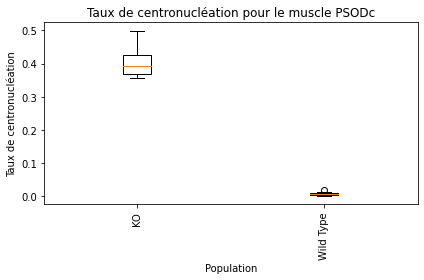

   Wild Type        KO
0   0.005046  0.427595
1   0.012708  0.355211
2   0.006849  0.365308
3   0.020024  0.392023
4   0.007276  0.416359
5   0.007789  0.498923
6   0.001391  0.380024
7   0.004440  0.448167
8   0.010432  0.356242
9   0.009950  0.390333
Wild Type v.s. KO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.827e-04 U_stat=0.000e+00


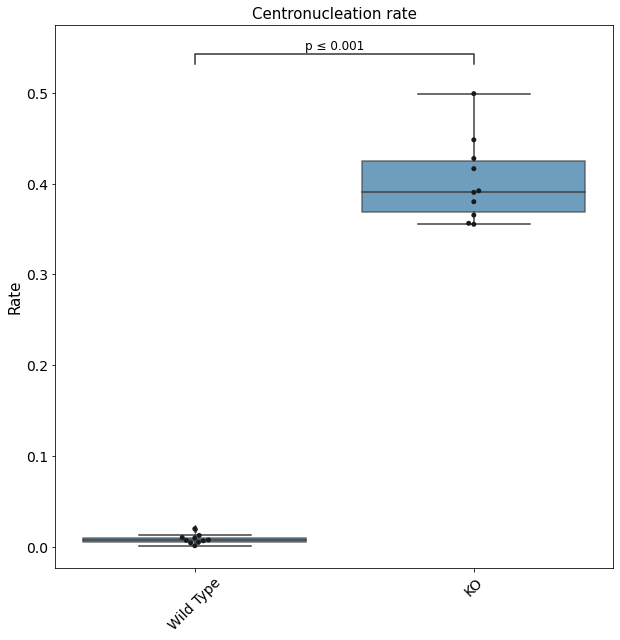

In [19]:
directory = "/home/mariereinbigler/QuPath/projects/Cellpose_fragmented_masks_retrained/InfDiam_Centro_results/"


    
for pattern in patterns: 
    centro_patt = []
    for i in range(len(files[pattern])):
        centro_rates=[]
        for file in files[pattern][i]:
            print(file)
            raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,11])
            centro_rates.append(centro_rate(raw_df, 'Class'))
        centro_patt.append(centro_rates)      

        
    fig7, ax7 = plt.subplots()
    ax7.set_title(f'Taux de centronucléation pour le muscle {pattern}')
    ax7.boxplot(centro_patt)
    ax7.set_xlabel("Population")
    ax7.set_ylabel("Taux de centronucléation")
    axes = plt.gca() 
    axes.xaxis.set_ticklabels(['KO', 'Wild Type'], rotation = 90)
    #axes.xaxis.set_ticklabels(['KO', 'Wild Type'], rotation = 90)
    plt.tight_layout()

    plt.savefig(f'Taux_centronucleation_{pattern}_diam35_ft05')
    plt.show()
    
    fig, ax=plt.subplots(figsize=(10,10))
    df  = pd.DataFrame(centro_patt)
    df = df.transpose()
    df.columns = ['KO', 'Wild Type']
    
    
    df = df[[ 'Wild Type', 'KO']]
    #df.columns = ['KO', 'Wild Type']
    print(df)
    #df['Type'] = ['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type']
    ax= sns.boxplot(data=df, color="tab:blue", boxprops=dict(alpha=.7))
    ax = sns.swarmplot(data=df, color=".1")  
    ax.set_ylabel("Rate", fontsize=15)
    ax.set_title("Centronucleation rate", fontsize=15)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14, rotation=45)
    
    plt.yticks(fontsize=14)
    
    add_stat_annotation(ax, data=df, perform_stat_test=True,  test='Mann-Whitney', fontsize='large',
                    box_pairs=[("KO", "Wild Type")],
                        text_format='simple', loc='inside', verbose=2)
    
    #plt.savefig('line_plot.pdf', bbox_inches='tight')  


S40L2-Scene-11-PSODc2.czi Annotations.txt
33.1148
S39L2-Scene-11-PSODc2.czi Annotations.txt
30.6873
S38L2-Scene-12-PSODc3.czi Annotations.txt
25.3114
S37L2-Scene-5-PSODc2.czi Annotations.txt
36.1871
S36L2-Scene-11-PSODc2.czi Annotations.txt
34.1352
S35L2-Scene-12-PSODc3.czi Annotations.txt
29.8114
S34L2-Scene-10-PSODc1.czi Annotations.txt
31.4995
S33L2-Scene-10-PSODc1.czi Annotations.txt
27.5643
S32L2-1-Scene-11-PSODc2.czi Annotations.txt
35.2286
S31L2-1-Scene-10-PSODc1.czi Annotations.txt
27.96855
S43L2-Scene-10-PSODc1.czi Annotations.txt
31.88445
S46L2-Scene-11-PSODc2.czi Annotations.txt
41.0587
S41L2-Scene-11-PSODc2.czi Annotations.txt
36.9944
S44L2-Scene-12-PSODc3.czi Annotations.txt
37.28165
S48L2-Scene-10-PSODc1.czi Annotations.txt
39.1016
S42L2-Scene-12-PSODc3.czi Annotations.txt
33.5195
S45L2-Scene-12-PSODc3.czi Annotations.txt
37.8653
S47L2-Scene-10-PSODc1.czi Annotations.txt
32.603350000000006
S49L2-Scene-12-PSODc3.czi Annotations.txt
37.21635
S50L2-Scene-12-PSODc3.czi Annota

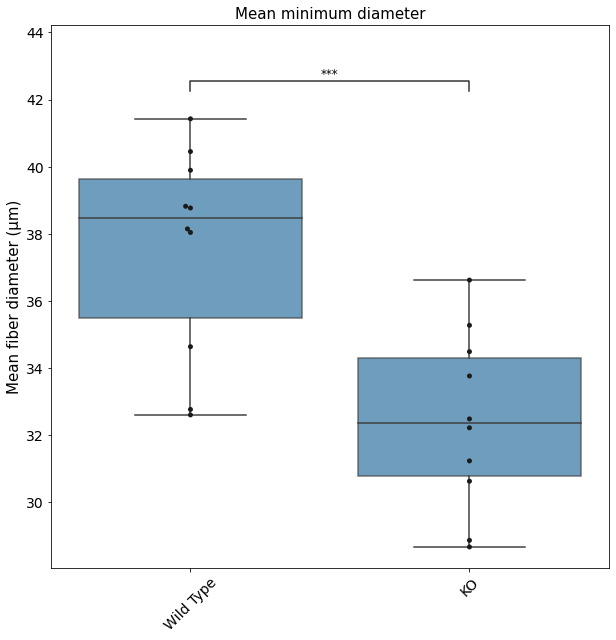

In [17]:
directory = "/home/mariereinbigler/QuPath/projects/Cellpose_fragmented_masks_retrained/InfDiam_Centro_results/"



for pattern in patterns: 
    mean_patt = []
    median_patt=[]
    for i in range(len(files[pattern])):
        means=[]
        medians=[]
        for file in files[pattern][i]:
            print(file)
            if file=='S33.ome.tif Annotations.txt':
                    raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,13])
            else:
                raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2,11])
            means.append(raw_df['Min diameter µm'].mean())
            medians.append(raw_df['Min diameter µm'].median())
            print(raw_df['Min diameter µm'].median())

        mean_patt.append(means) 
        median_patt.append(medians)

    fig, ax=plt.subplots(figsize=(10,10))
    
    df = pd.DataFrame(mean_patt)
    df = df.transpose()
  
    df.columns = ['KO', 'Wild Type']
    #df.columns = ['KO', 'Wild Type']
    #df['Wild Type'].iloc[4] = np.NaN
    df = df[[ 'Wild Type', 'KO']]
    print(df['Wild Type'].iloc[4])
    print(df)
    #df['Type'] = ['Forte dose', 'Moyenne dose', 'Faible dose', 'KO', 'Wild Type']
    ax= sns.boxplot(data=df, color="tab:blue", boxprops=dict(alpha=.7))
    ax = sns.swarmplot(data=df, color=".1")   
    ax.set_title("Mean minimum diameter", fontsize=15)
    ax.set_ylabel("Mean fiber diameter (µm)", fontsize=15)
    plt.xticks(rotation=45,fontsize=14)  
    plt.yticks(fontsize=14)
    
    add_stat_annotation(ax, data=df, perform_stat_test=True,  test='t-test_ind', fontsize='large',
                    box_pairs=[("KO", "Wild Type")],
                        text_format='star', loc='inside', verbose=2)    
    #plt.savefig(f'Mediane_moyenne_{pattern}_diam35_ft05_Seaborn')

In [51]:
for pattern in patterns: 

    for i in range(len(files[pattern])):
        raw_df = pd.read_csv(directory + file, delimiter="\t", usecols=[0,2, 13])
        print(raw_df)

            Image    Class  Min diameter µm
0     S33.ome.tif  Normale          17.5321
1     S33.ome.tif  Normale          54.4352
2     S33.ome.tif  Normale          29.9543
3     S33.ome.tif   Centro          34.6302
4     S33.ome.tif   Centro          39.4513
...           ...      ...              ...
1956  S33.ome.tif   Centro          26.8252
1957  S33.ome.tif  Normale          23.6811
1958  S33.ome.tif  Normale          54.8954
1959  S33.ome.tif   Centro          15.3295
1960  S33.ome.tif  Normale          12.3761

[1961 rows x 3 columns]
            Image    Class  Min diameter µm
0     S33.ome.tif  Normale          17.5321
1     S33.ome.tif  Normale          54.4352
2     S33.ome.tif  Normale          29.9543
3     S33.ome.tif   Centro          34.6302
4     S33.ome.tif   Centro          39.4513
...           ...      ...              ...
1956  S33.ome.tif   Centro          26.8252
1957  S33.ome.tif  Normale          23.6811
1958  S33.ome.tif  Normale          54.8954
1959  S

In [72]:
times_df = pd.read_csv('/home/mariereinbigler/These/CellposeArticle/TimeBenchmark/retrained/sandor/times_PSOD_3.txt', delimiter=";", names=['Image', 'Segm time', 'PNG generation', 'Total time'], usecols=[0,1,2,3])

In [73]:
times_df

Image  Segm time  \
0     S10L2-1-Scene-12-PSODc3_[x=0,y=1280,w=712,h=71...   0.198264   
1     S10L2-1-Scene-12-PSODc3_[x=0,y=1792,w=712,h=71...   0.339736   
2     S10L2-1-Scene-12-PSODc3_[x=0,y=2304,w=712,h=71...   0.314210   
3     S10L2-1-Scene-12-PSODc3_[x=0,y=256,w=712,h=712...   0.189916   
4     S10L2-1-Scene-12-PSODc3_[x=0,y=2816,w=712,h=71...   0.309909   
...                                                 ...        ...   
7324  S9L2-1-Scene-11-PSODc2_[x=6144,y=3888,w=712,h=...   0.319041   
7325  S9L2-1-Scene-11-PSODc2_[x=6144,y=4400,w=712,h=...   0.318958   
7326  S9L2-1-Scene-11-PSODc2_[x=6144,y=4912,w=712,h=...   0.287251   
7327  S9L2-1-Scene-11-PSODc2_[x=6144,y=5424,w=712,h=...   0.285823   
7328  S9L2-1-Scene-11-PSODc2_[x=6144,y=816,w=712,h=7...   0.189395   

      PNG generation  Total time  
0           1.129960    1.328223  
1           1.001831    1.341567  
2           1.080933    1.395143  
3           1.161548    1.351464  
4           1.071724    1.381633  
...              ...         ...  
7324        1.036374    1.355415  
7325        1.022083    1.341041  
7326        1.090725    1.377977  
7327        1.103622    1.389445  
7328        0.975702    1.165097  

[7329 rows x 4 columns]

In [74]:
times_df['Image'] = times_df['Image'].str.split("_").str[0]

In [75]:
times_df

Image  Segm time  PNG generation  Total time
0     S10L2-1-Scene-12-PSODc3   0.198264        1.129960    1.328223
1     S10L2-1-Scene-12-PSODc3   0.339736        1.001831    1.341567
2     S10L2-1-Scene-12-PSODc3   0.314210        1.080933    1.395143
3     S10L2-1-Scene-12-PSODc3   0.189916        1.161548    1.351464
4     S10L2-1-Scene-12-PSODc3   0.309909        1.071724    1.381633
...                       ...        ...             ...         ...
7324   S9L2-1-Scene-11-PSODc2   0.319041        1.036374    1.355415
7325   S9L2-1-Scene-11-PSODc2   0.318958        1.022083    1.341041
7326   S9L2-1-Scene-11-PSODc2   0.287251        1.090725    1.377977
7327   S9L2-1-Scene-11-PSODc2   0.285823        1.103622    1.389445
7328   S9L2-1-Scene-11-PSODc2   0.189395        0.975702    1.165097

[7329 rows x 4 columns]

In [76]:
times_df['Image'].values

array(['S10L2-1-Scene-12-PSODc3', 'S10L2-1-Scene-12-PSODc3',
       'S10L2-1-Scene-12-PSODc3', ..., 'S9L2-1-Scene-11-PSODc2',
       'S9L2-1-Scene-11-PSODc2', 'S9L2-1-Scene-11-PSODc2'], dtype=object)

In [79]:
times_df = times_df.groupby("Image").sum()

In [80]:
times_df

Segm time  PNG generation  Total time
Image                                                          
S10L2-1-Scene-12-PSODc3   60.325147      143.484303  203.809450
S11L2-Scene-11-PSODc2    108.216295      221.442022  329.658317
S12L2-Scene-12-PSODc3    238.995644      447.173469  686.169112
S13L2-1-Scene-12-PSODc3  112.299041      214.458493  326.757534
S14L2-1-Scene-10-PSODc1  113.806891      216.808797  330.615688
S15L2-1-Scene-11-PSODc2   85.483034      190.720478  276.203512
S16L2-1-Scene-12-PSODc3  113.493793      220.070414  333.564207
S17L2-1-Scene-12-PSODc3  115.816356      222.293461  338.109817
S18L2-1-Scene-12-PSODc3  102.787433      195.281549  298.068982
S19L2-1-Scene-11-PSODc2   84.583278      167.239000  251.822278
S1L2-Scene-11-PSODc2      45.024514       82.309964  127.334479
S20L2-1-Scene-12-PSODc3  114.280058      218.593690  332.873748
S21L2-1-Scene-12-PSODc3   89.301960      184.789230  274.091190
S22L2-1-Scene-11-PSODc2   98.673891      185.303927  283.977818
S23L2-1-Scene-11-PSODc2   74.442682      145.853051  220.295732
S24L2-1-Scene-11-PSODc2   82.011472      182.988707  265.000179
S25L2-1-Scene-12-PSODc3  167.862171      314.295442  482.157614
S26L2-1-Scene-10-PSODc1   89.063208      177.737716  266.800925
S27L2-1-Scene-10-PSODc1  100.225394      196.685085  296.910478
S28L2-1-Scene-11-PSODc2  106.835237      222.429768  329.265005
S29L2-1-Scene-11-PSODc2  164.228826      336.569200  500.798026
S2L2-Scene-10-PSODc1      60.736980      109.299524  170.036504
S30L2-1-Scene-10-PSODc1   78.908588      141.072039  219.980627
S31L2-1-Scene-10-PSODc1   86.812111      170.923158  257.735269
S32L2-1-Scene-11-PSODc2  101.085693      188.525338  289.611031
S33L2-Scene-10-PSODc1     84.335747      194.818002  279.153749
S34L2-Scene-10-PSODc1     80.604253      167.942846  248.547099
S35L2-Scene-12-PSODc3     97.408023      191.283528  288.691550
S36L2-Scene-11-PSODc2    157.849591      305.772826  463.622417
S37L2-Scene-5-PSODc2     156.280943      292.829890  449.110833
S38L2-Scene-12-PSODc3    103.749215      212.909652  316.658867
S39L2-Scene-11-PSODc2     93.611401      182.969158  276.580559
S3L2-Scene-11-PSODc2      77.345861      139.023998  216.369859
S40L2-Scene-11-PSODc2    100.125602      202.146719  302.272321
S41L2-Scene-11-PSODc2     48.179980       91.757672  139.937652
S42L2-Scene-12-PSODc3     88.131371      194.659753  282.791124
S43L2-Scene-10-PSODc1     74.523723      155.378294  229.902016
S44L2-Scene-12-PSODc3     92.552815      174.766472  267.319287
S45L2-Scene-12-PSODc3     73.036088      174.304875  247.340963
S46L2-Scene-11-PSODc2     76.801051      176.276203  253.077254
S47L2-Scene-10-PSODc1     72.896126      170.208388  243.104514
S48L2-Scene-10-PSODc1     99.457042      206.662730  306.119771
S49L2-Scene-12-PSODc3    105.559753      193.433883  298.993637
S4L2-Scene-11-PSODc2      63.826035      114.289196  178.115231
S50L2-Scene-12-PSODc3    105.620798      217.781617  323.402415
S5L2-1-Scene-11-PSODc2    84.980886      174.278150  259.259035
S6L2-1-Scene-11-PSODc2   148.748836      282.179124  430.927960
S7L2-1-Scene-12-PSODc3    73.886571      138.603530  212.490101
S8L2-1-Scene-12-PSODc3    85.628475      176.234827  261.863302
S9L2-1-Scene-11-PSODc2    78.223355      179.886502  258.109856

In [81]:
means = []

platforms = [ "sandor"]

for platform in platforms:
    mean=[]
    for i in range(1,6):
        times_df = pd.read_csv("/home/mariereinbigler/These/CellposeArticle/TimeBenchmark/retrained/" + platform + "/times_PSOD_" + str(i) + ".txt", delimiter=";", usecols=[0,1,2,3], names=['Image', 'Segm time', 'PNG generation', 'Total time'])
        times_df['Image'] = times_df['Image'].str.split("_").str[0]
        times_df = times_df.groupby("Image").sum()
        mean.append(times_df['Total time'].mean())
    means.append(mean)

       sandor
0  292.758391
1  294.448694
2  294.508178
3  294.702079
4  294.597170


Text(16.300000000000004, 0.5, 'Time (min)')

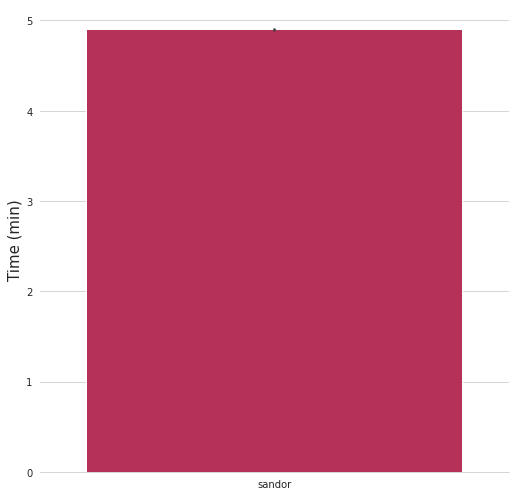

In [85]:
tips = pd.DataFrame(means).transpose()
tips.columns = platforms

print(tips)
tips = tips/60

sns.set_style("whitegrid")

g = sns.catplot(
    data=tips, kind="bar",
    palette="rocket", alpha=1, height=7
)
g.despine(left=True)
#g.set_xticklabels(['Intel Core \ni7-10710U CPU,\n 32 GB RAM', 'Intel Core \ni5-8400 CPU,\n 32 GB RAM', 'AMD EPYC 7502\n 32-Core Processor,\n 512 GB RAM, \nNvidia Quadro RTX \n5000 GPU']
, size=13)
#plt.title("Total execution time including segmentation \n and PNG export", fontsize=15)

plt.ylabel("Time (min)", fontsize=15)